In [1]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from Energy_Levels import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)
import time
from matplotlib.colors import TwoSlopeNorm

Added /Users/arianjadbabaie/Dropbox (Hutzler Lab)/HutzlerLabShared/Personal/ArianJadbabaie/Code/Molecular-Structure/Source Code to sys.path


In [2]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [11]:
# Bstep = 0.2
# Bz = np.arange(0,5+Bstep,Bstep)
Bz = np.linspace(0*1e-3,2,101)
Ez = np.linspace(0,2000,2001)
# Estep = 0.01
# Ez = np.arange(0,80+Estep,Estep)
print(len(Ez),len(Bz))
print(len(Ez)*len(Bz))

2001 101
202101


In [12]:
state_dict = {}
eval_dict = {}
evec_dict = {}
PTV_dict = {}
N=3

# M_range = range(-(N+1),N+2,1)
M_range=[-1,1]
for M in M_range:
    M_state = MoleculeLevels.initialize_state('YbOH','174','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[M],P_values=[1/2,3/2],trap=False)
    state_dict[M] = M_state
    print(M)
    t0 = time.perf_counter()
    Bslices = M_state.EB_grid(Ez,Bz,PTV=True,reverse=True,E_or_B_first='E',trap_shifts=False,output=True,evecs=True,EDM_or_MQM='EDM')
    t1 = time.perf_counter()
    elapsed = t1 - t0
    print(elapsed, 'sec\n')
    eval_dict[M] = Bslices[0]
    PTV_dict[M] = Bslices[1]
    evec_dict[M] = Bslices[2]
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

-1
[0 1 2 3 4 5 6 7]
3.5934587090159766 sec

1
[0 1 2 3 4 5 6 7]
3.512990749964956 sec



In [12]:
read = False
date = '20220608'
folder = r'JSON_data/'
N=1

if read:
    state_dict = {}
    eval_dict = {}
    evec_dict = {}
    PTV_dict = {}
#     for M in range(-(N+1),N+2,1):
    for M in [-1,1]:
        M_state = MoleculeLevels.initialize_state('YbOH','40','X010',[N],M_values = 'custom',I=[0,1/2],S=1/2,round=10,M_range=[M],P_values=[1/2,3/2])
        state_dict[M] = M_state
        print(M)
        eval_dict[M] = get_json_data(folder+'X010_YbOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date),numpy=True)
        PTV_dict[M] = get_json_data(folder+'X010_YbOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date),numpy=True)
        evec_dict[M] = get_json_data(folder+'X010_YbOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date),numpy=True)
    mesh = get_json_data(folder+'X010_YbOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)

In [13]:
save=False
date = '20230608'
folder = r'JSON_data/'
N=N
if save:
    for M in eval_dict.keys():
            save_json_data(eval_dict[M].tolist(),folder+'X010_YbOH_N{}_M{}_EB_grid_evals_{}'.format(N,M,date))
            save_json_data(PTV_dict[M].tolist(),folder+'X010_YbOH_N{}_M{}_EB_grid_PTV_{}'.format(N,M,date))
            save_json_data(evec_dict[M].tolist(),folder+'X010_YbOH_N{}_M{}_EB_grid_evecs_{}'.format(N,M,date))
    mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
    save_json_data(mesh.tolist(),folder+'X010_YbOH_N{}_EzBz_grid_{}'.format(N,date))
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

In [14]:
# mesh = get_json_data(folder+'X010_CaOH_N{}_EzBz_grid_{}'.format(N,date),numpy=True)
# Ez = mesh[0,:,0]
# Bz = mesh[1,0,:]

-3
-2
-1


/var/folders/29/ry9rgx5n4f1b1kcqm_7cqgkm0000gn/T/ipykernel_9625/2820434963.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


0
1
2
3


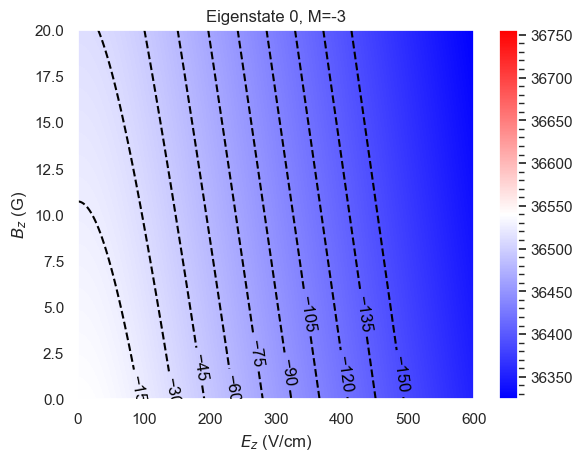

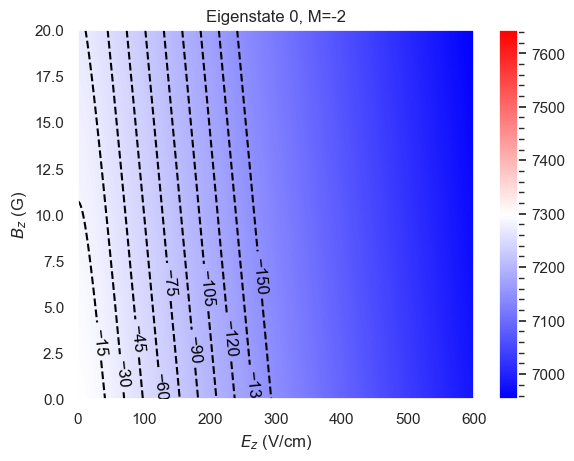

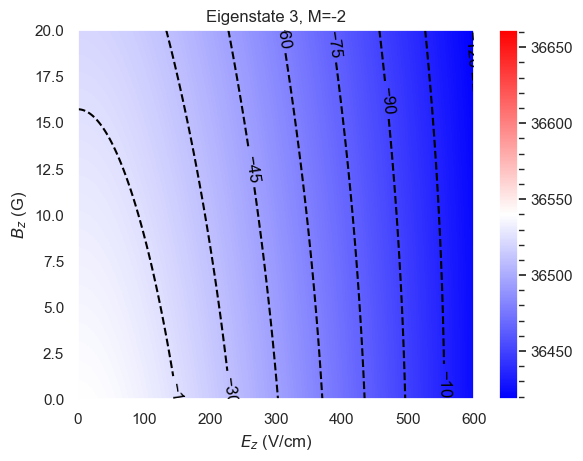

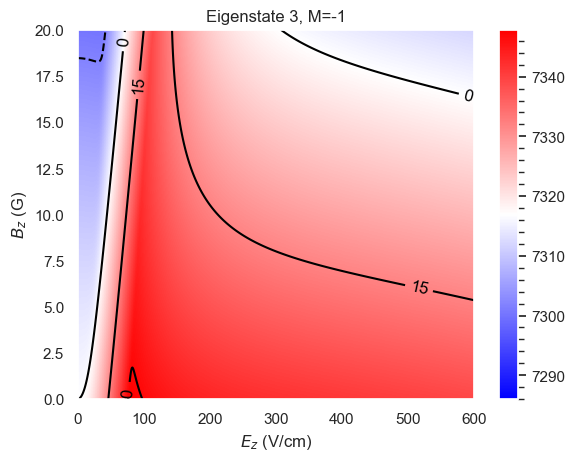

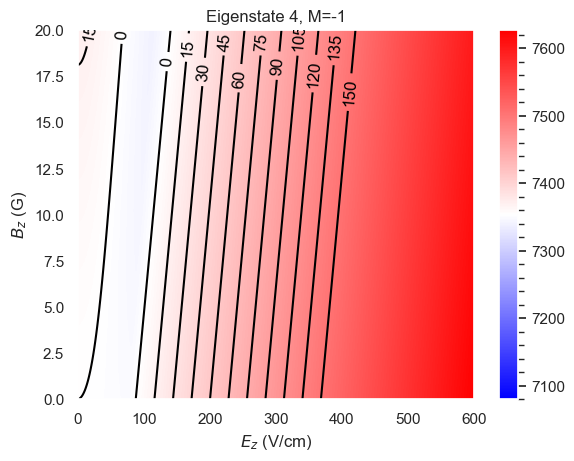

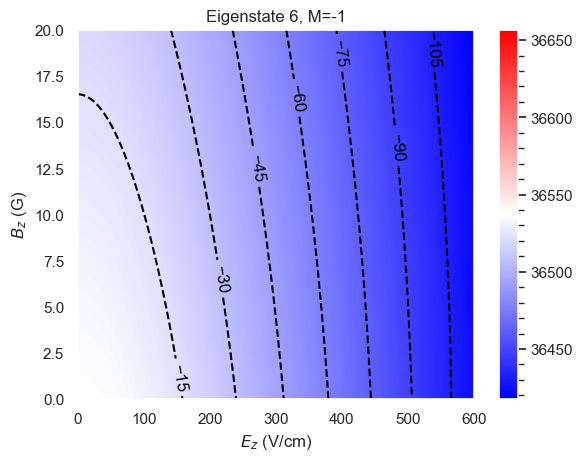

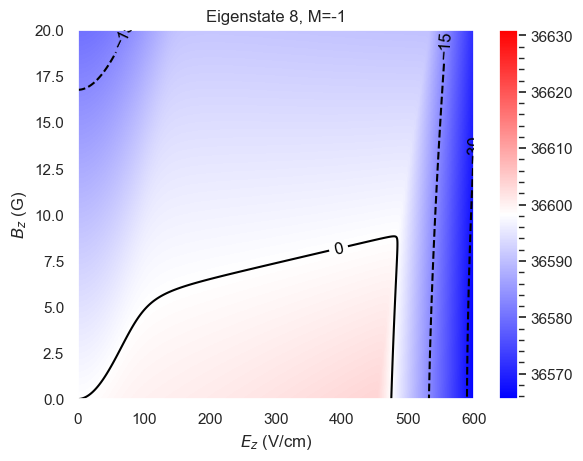

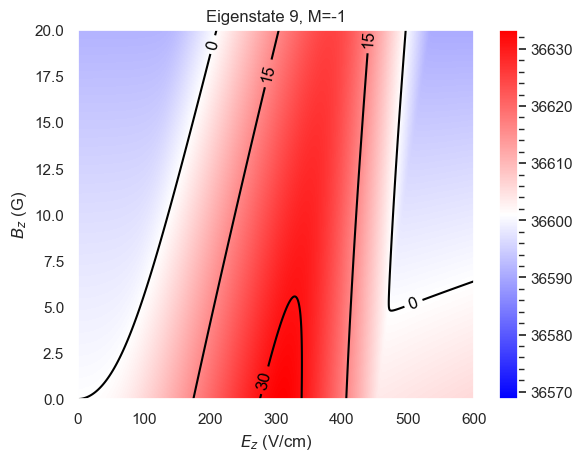

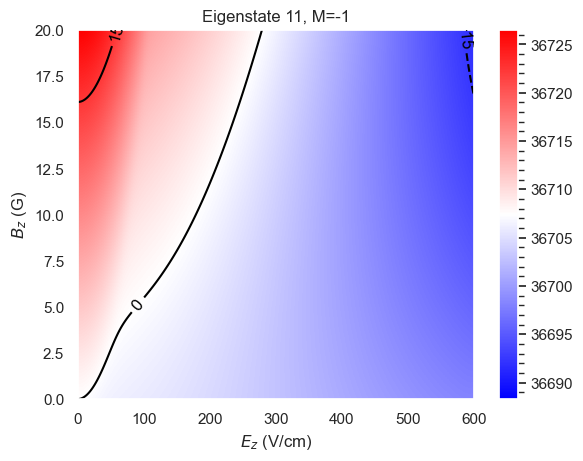

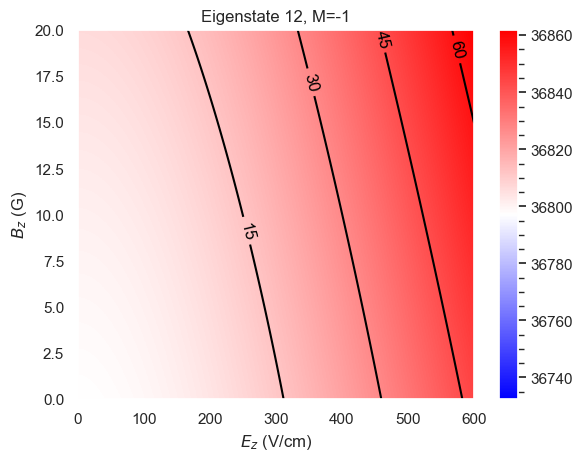

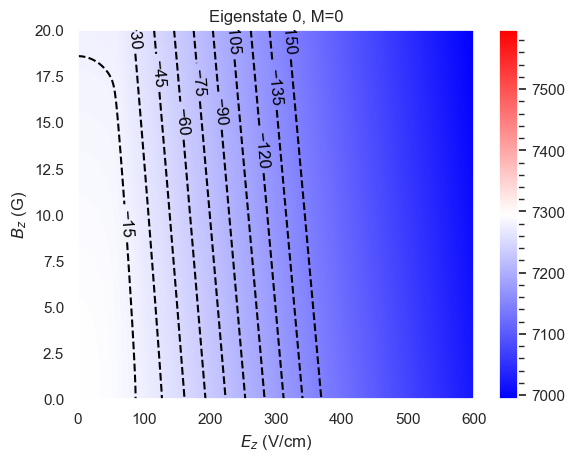

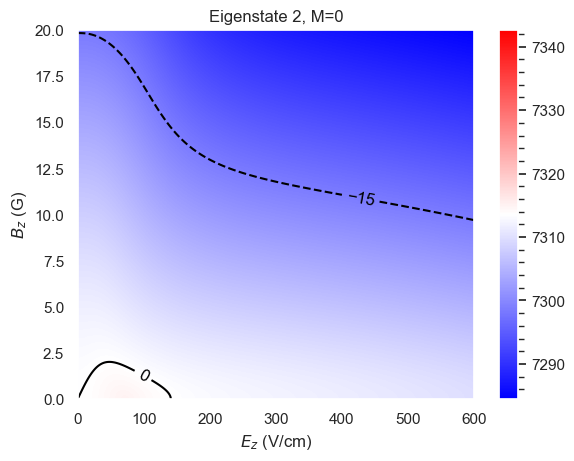

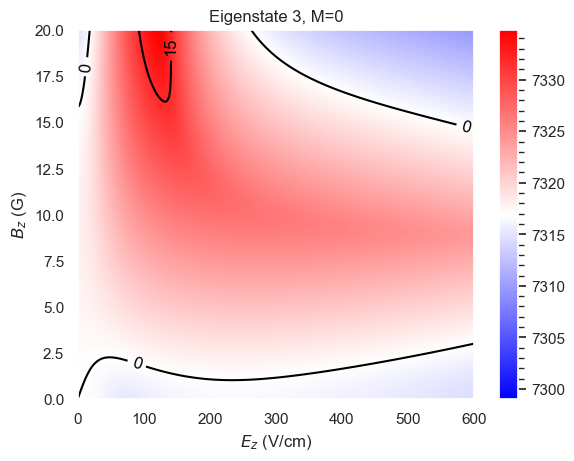

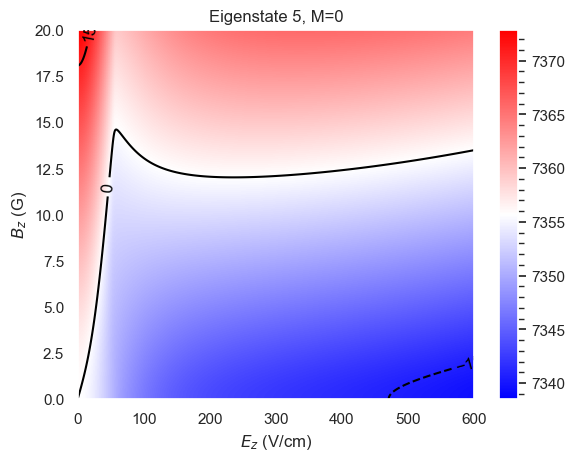

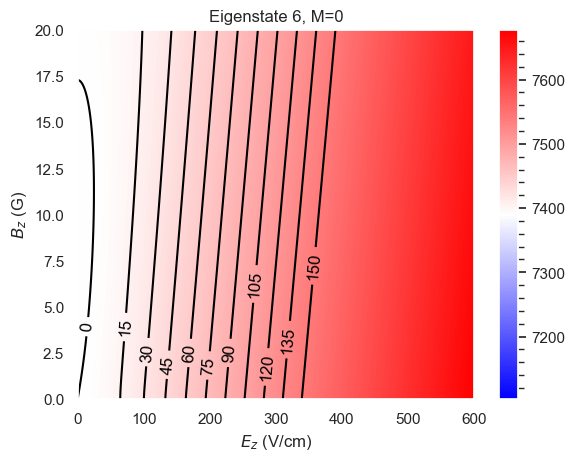

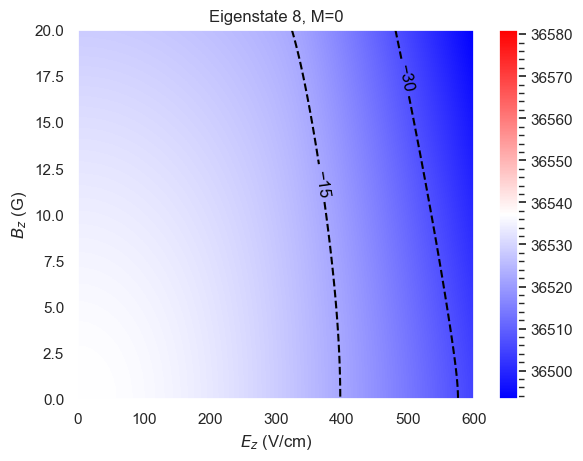

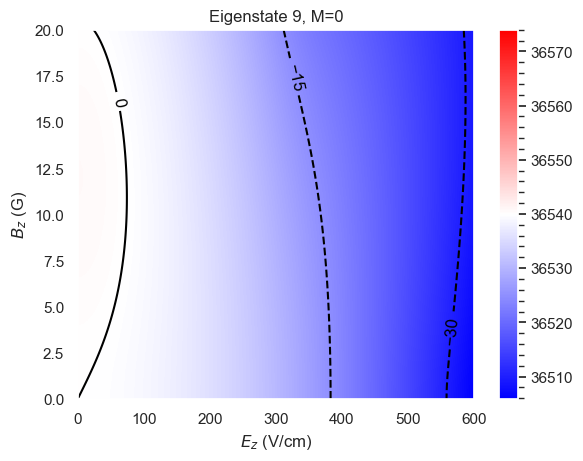

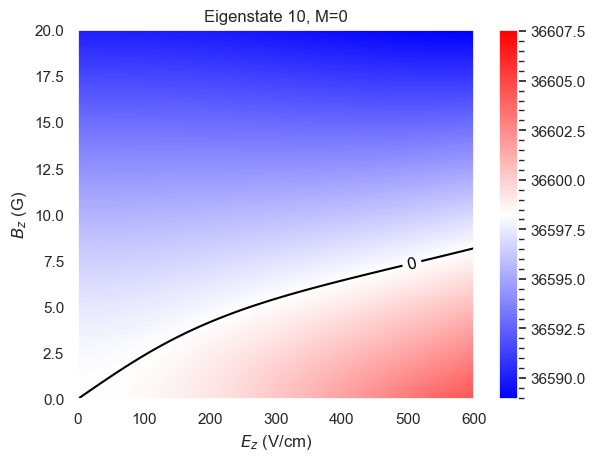

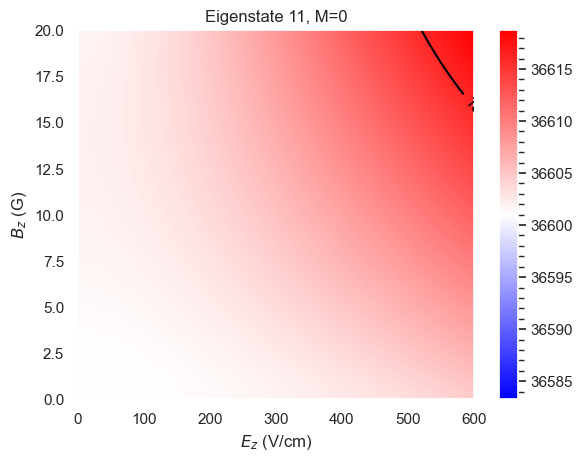

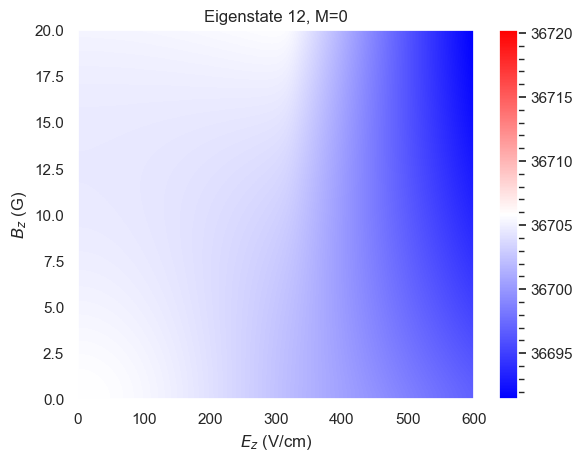

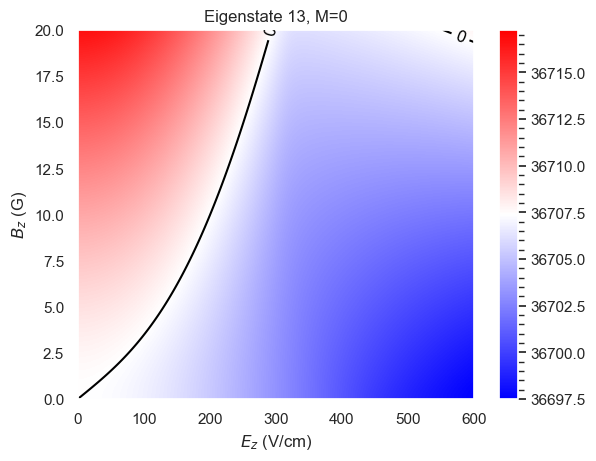

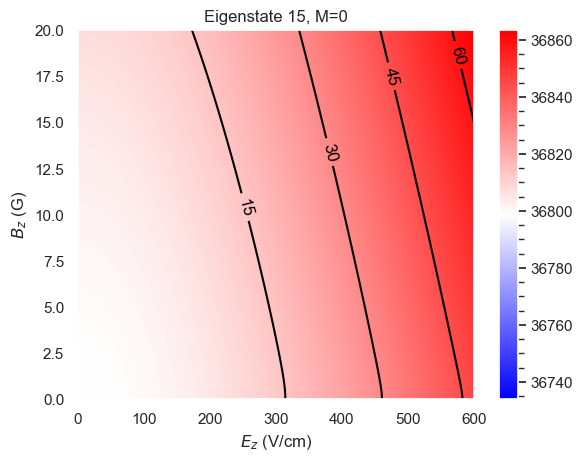

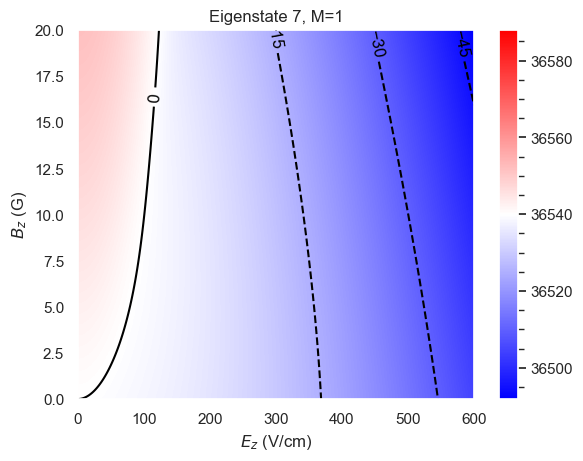

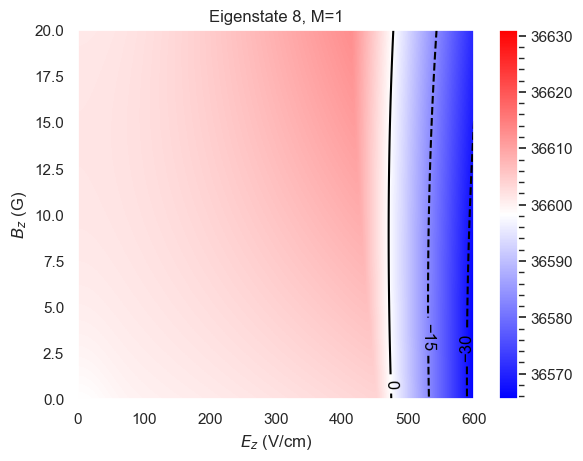

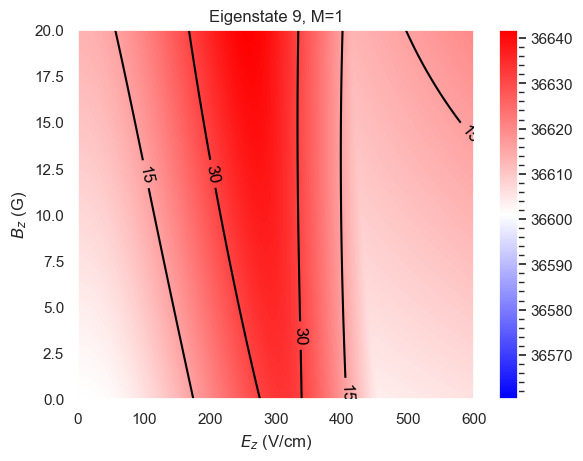

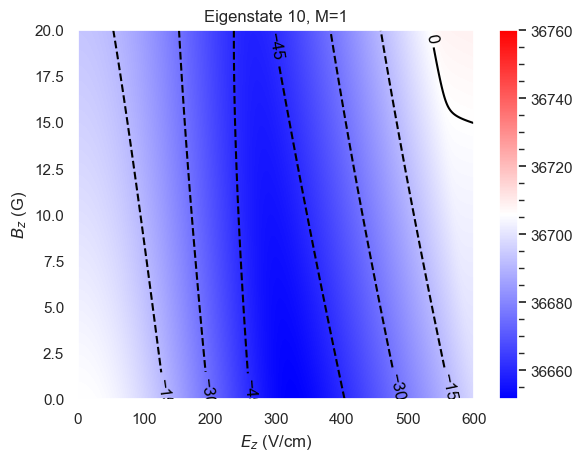

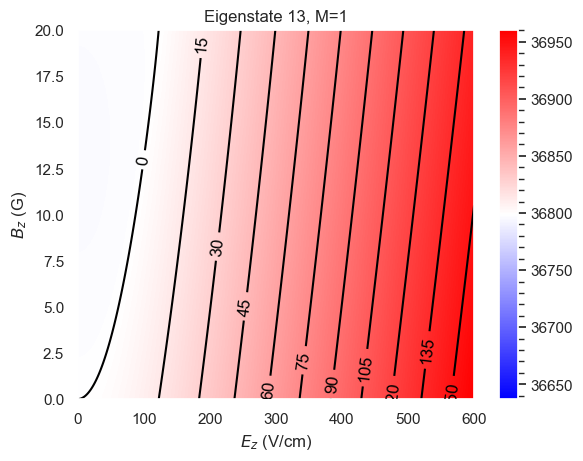

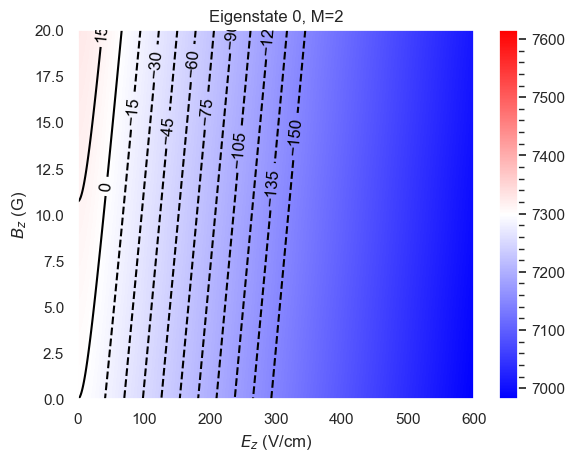

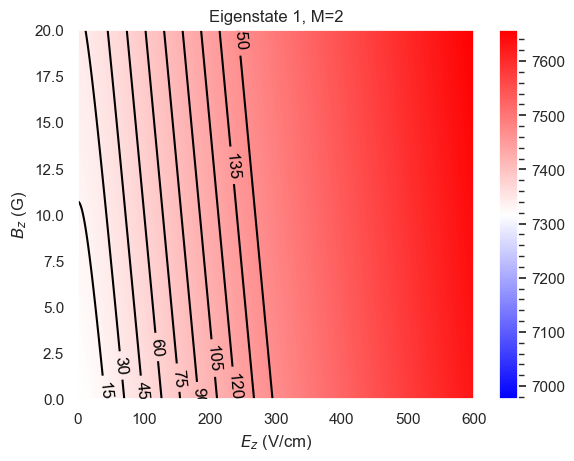

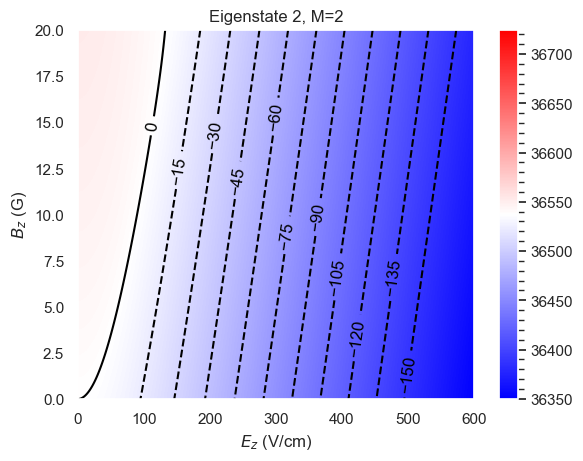

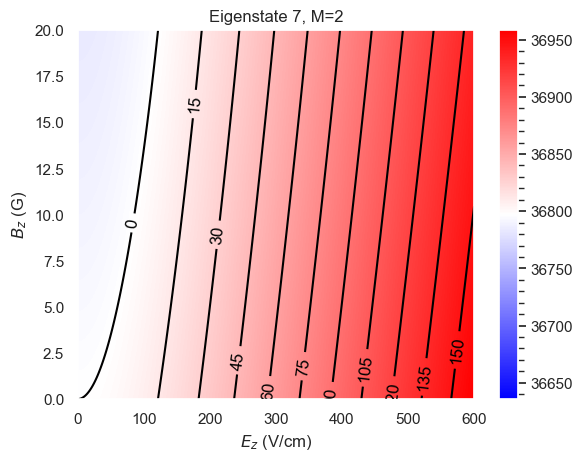

In [8]:
with_contour=True
for M in eval_dict.keys():
    print(M)
    evals_EB = eval_dict[M]
    for i in range(len(evals_EB)):
        plt.figure()
        E0 = evals_EB[i][0,0]
        max_delta = max(abs(evals_EB[i].max()-E0),abs(evals_EB[i].min()-E0))
        plt.grid(False)
        plt.pcolormesh(*mesh,evals_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=E0,vmin=E0-max_delta,vmax=E0+max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')
        if with_contour:
            try:
                conmap = plt.contour(*mesh,evals_EB[i]-E0,colors='black',levels=np.linspace(-150,150,21))#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")

-3
-2
-1
0
1
2


/var/folders/29/ry9rgx5n4f1b1kcqm_7cqgkm0000gn/T/ipykernel_9625/3613050182.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,10))


3


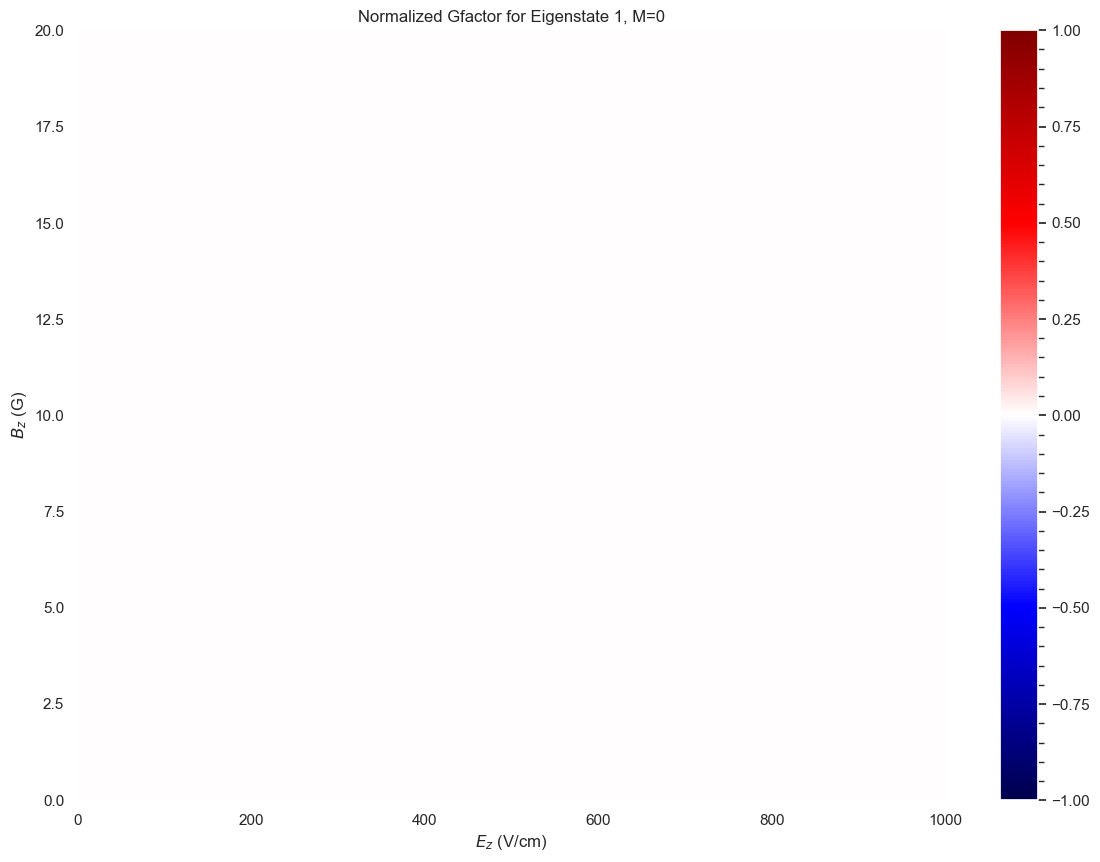

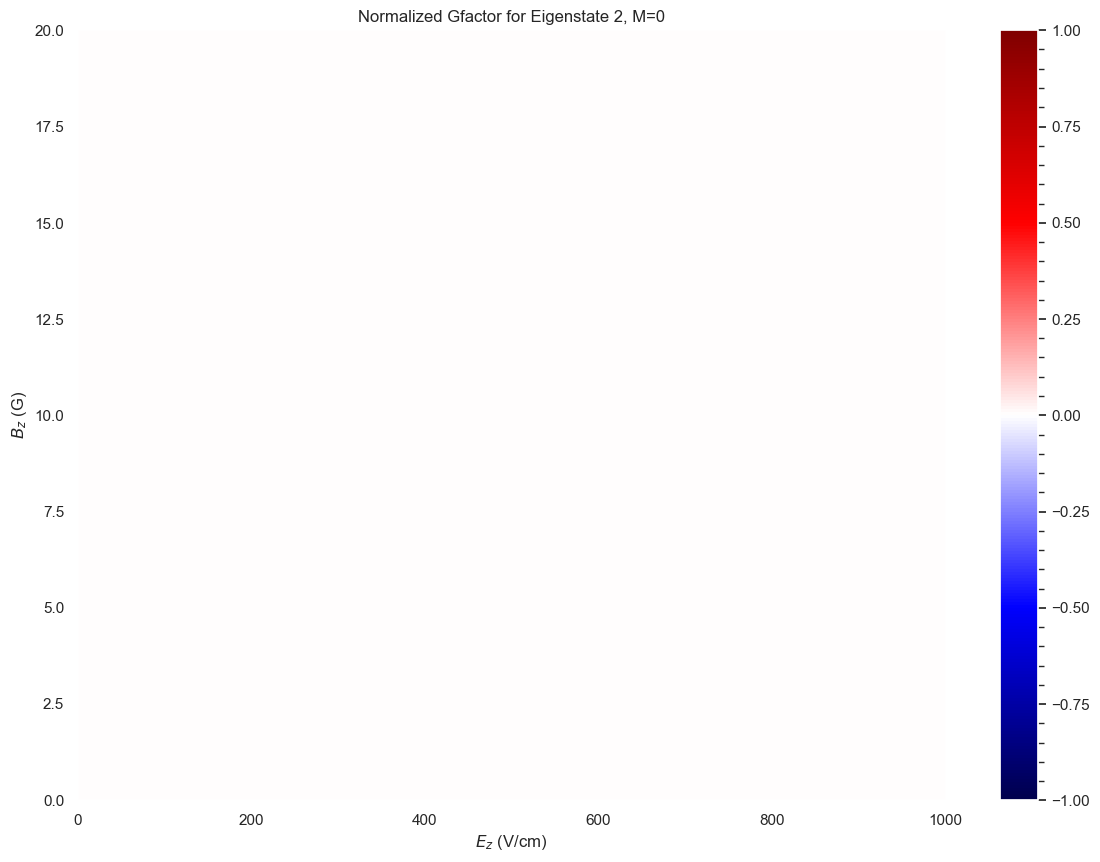

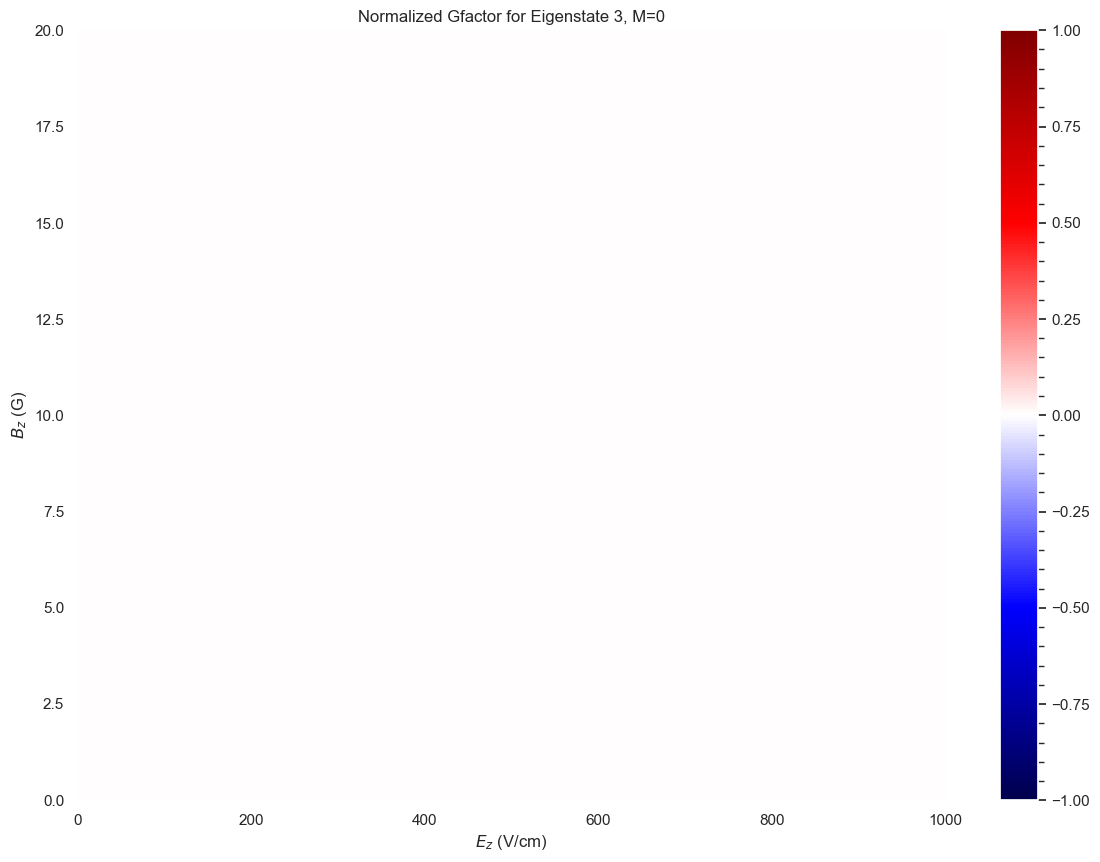

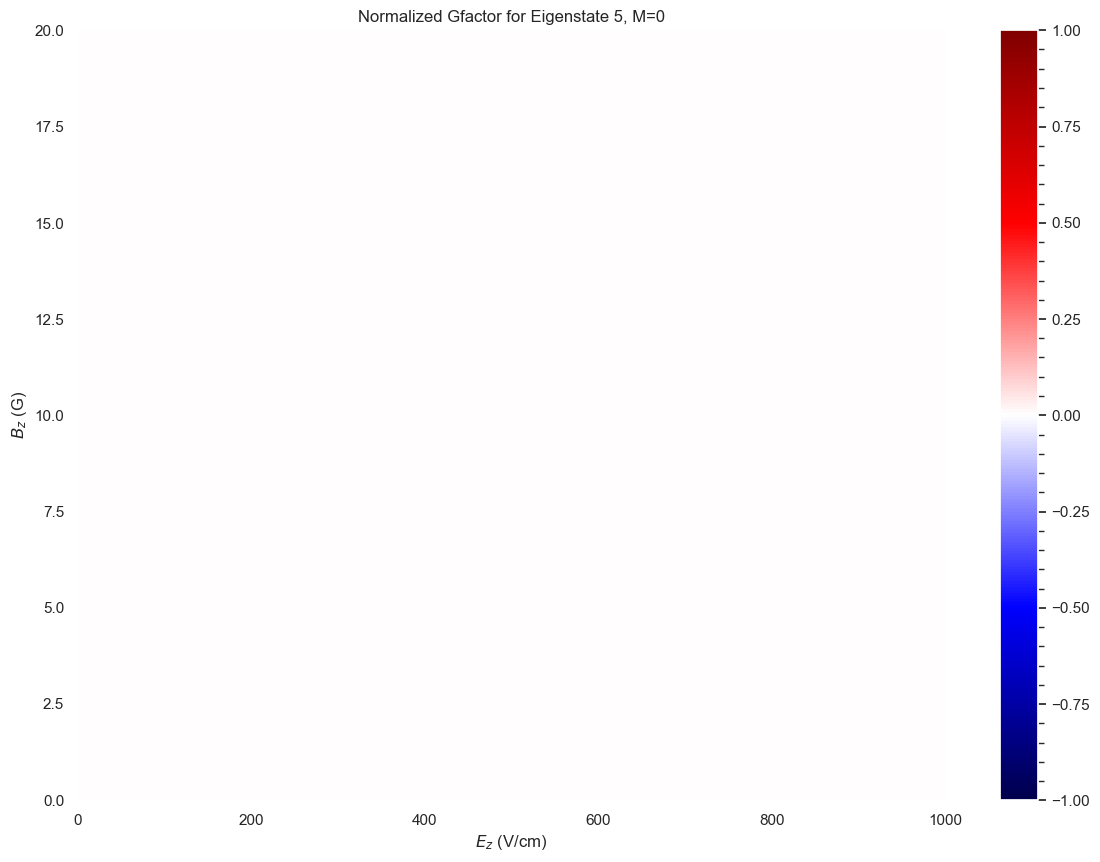

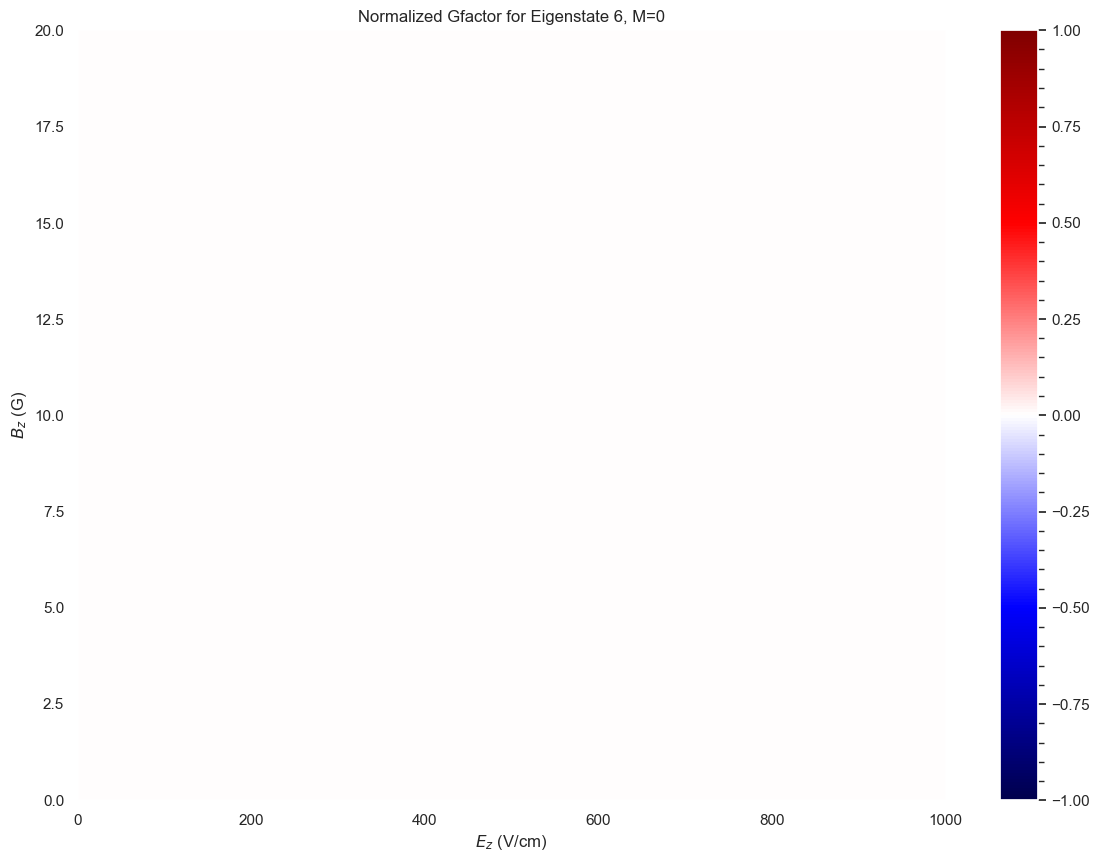

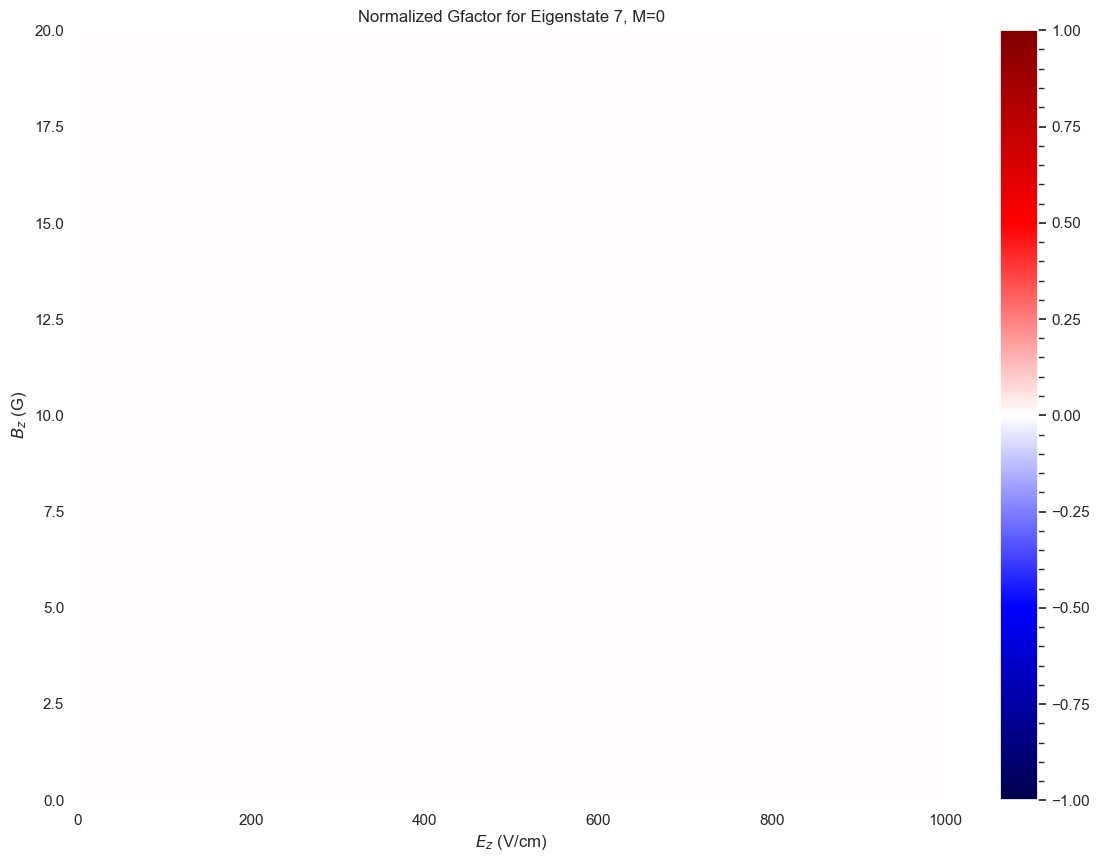

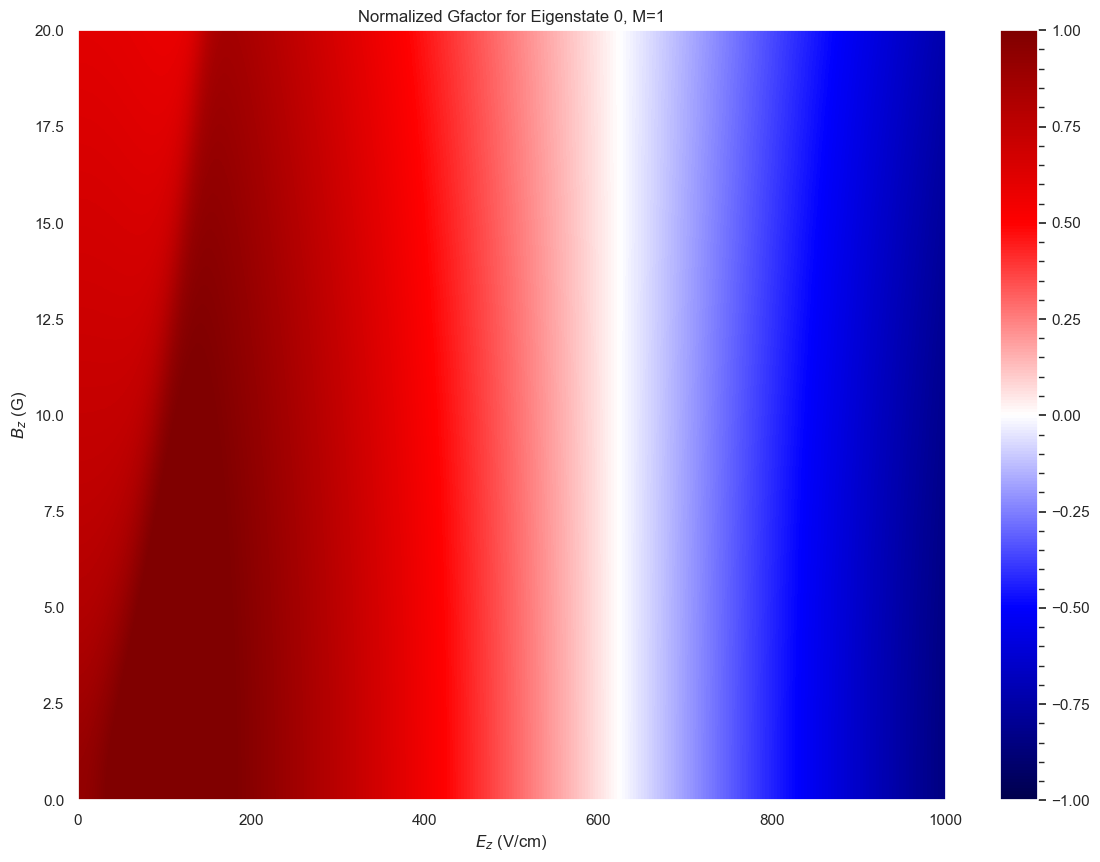

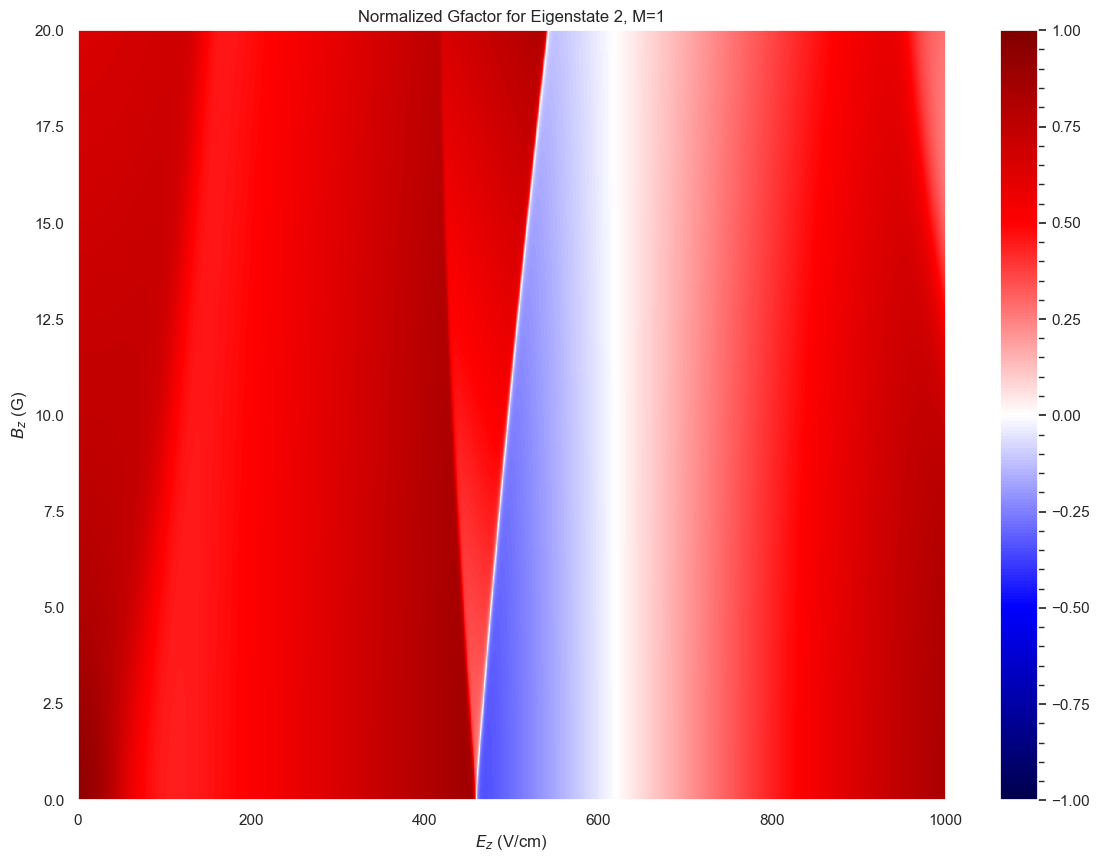

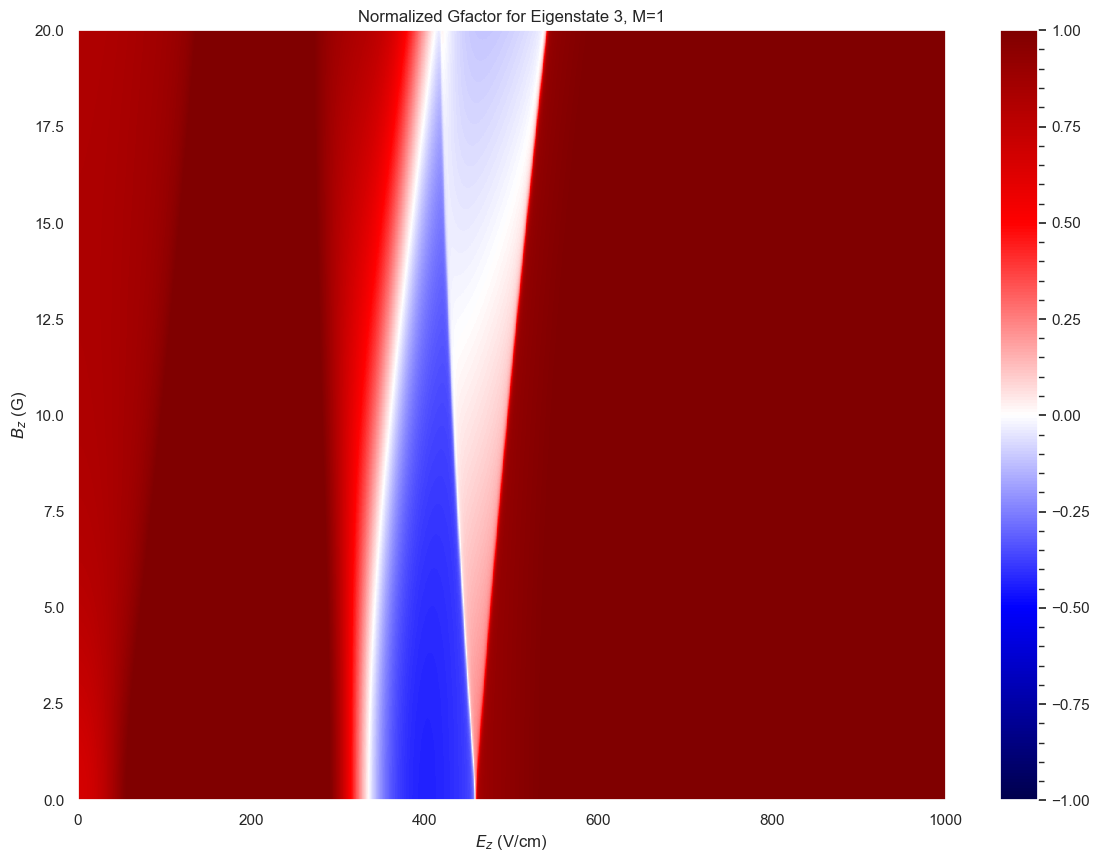

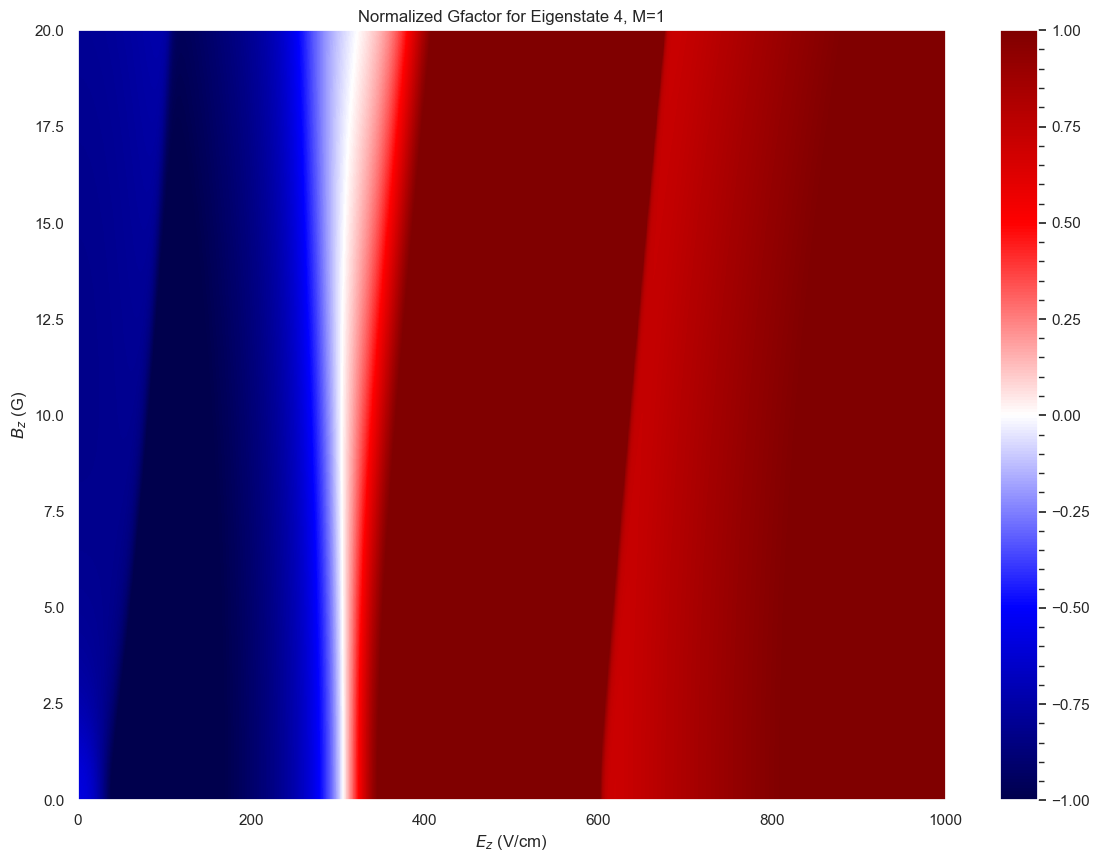

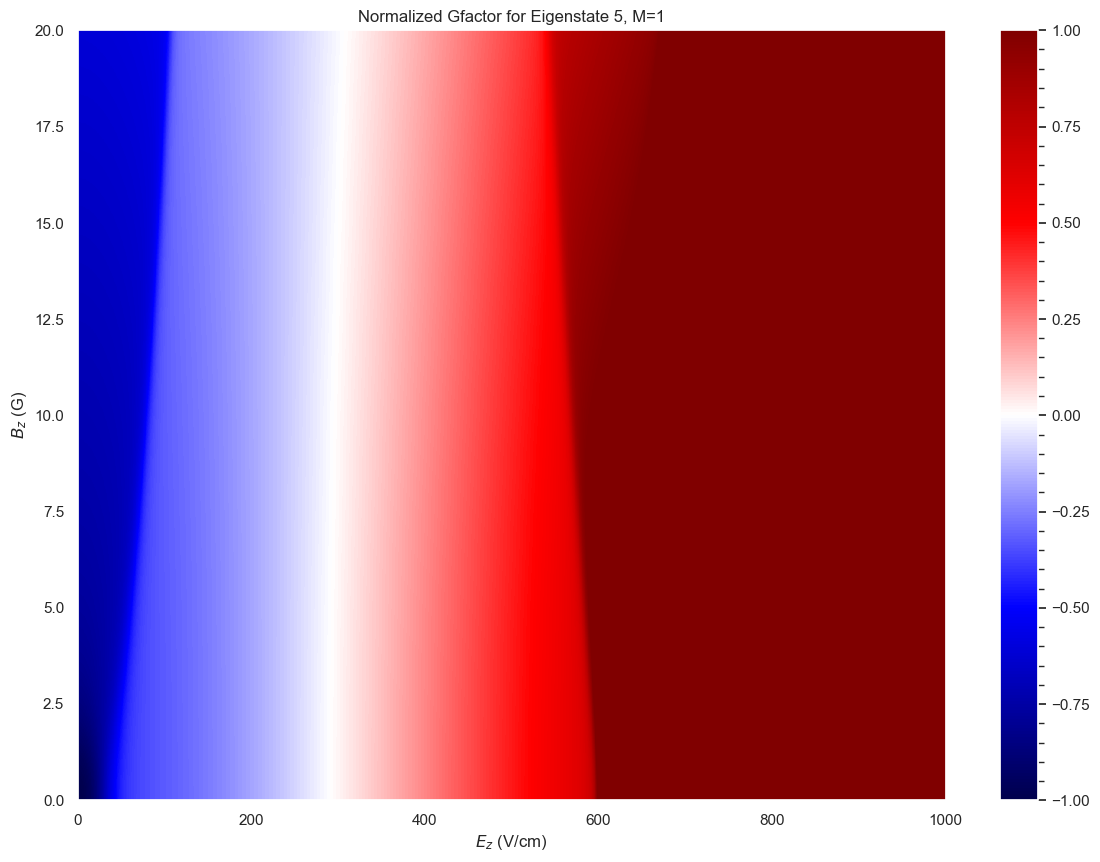

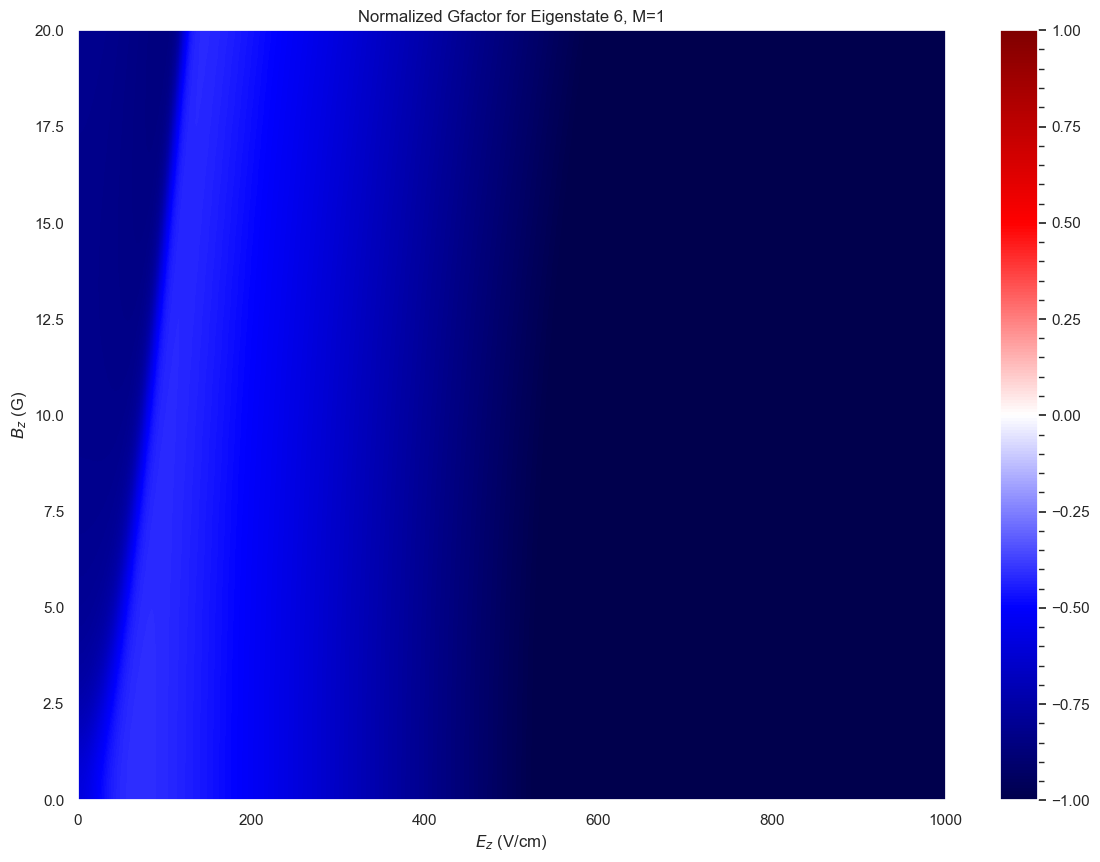

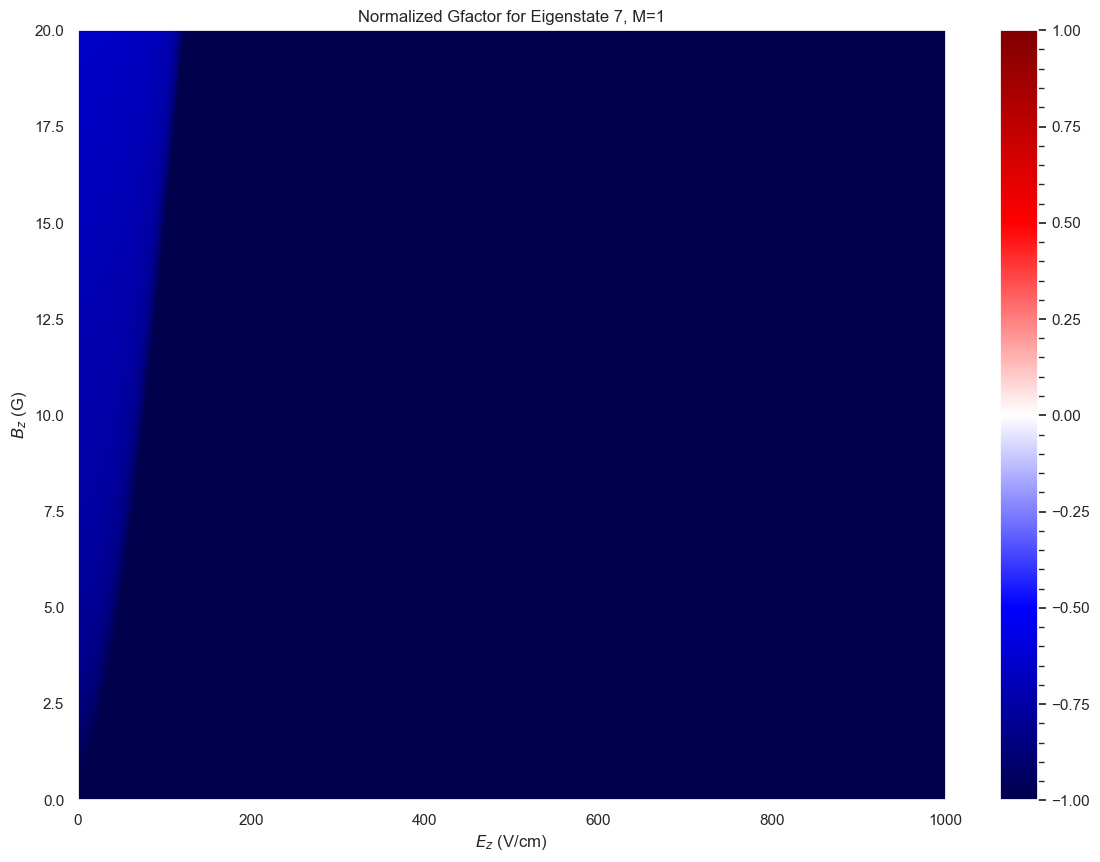

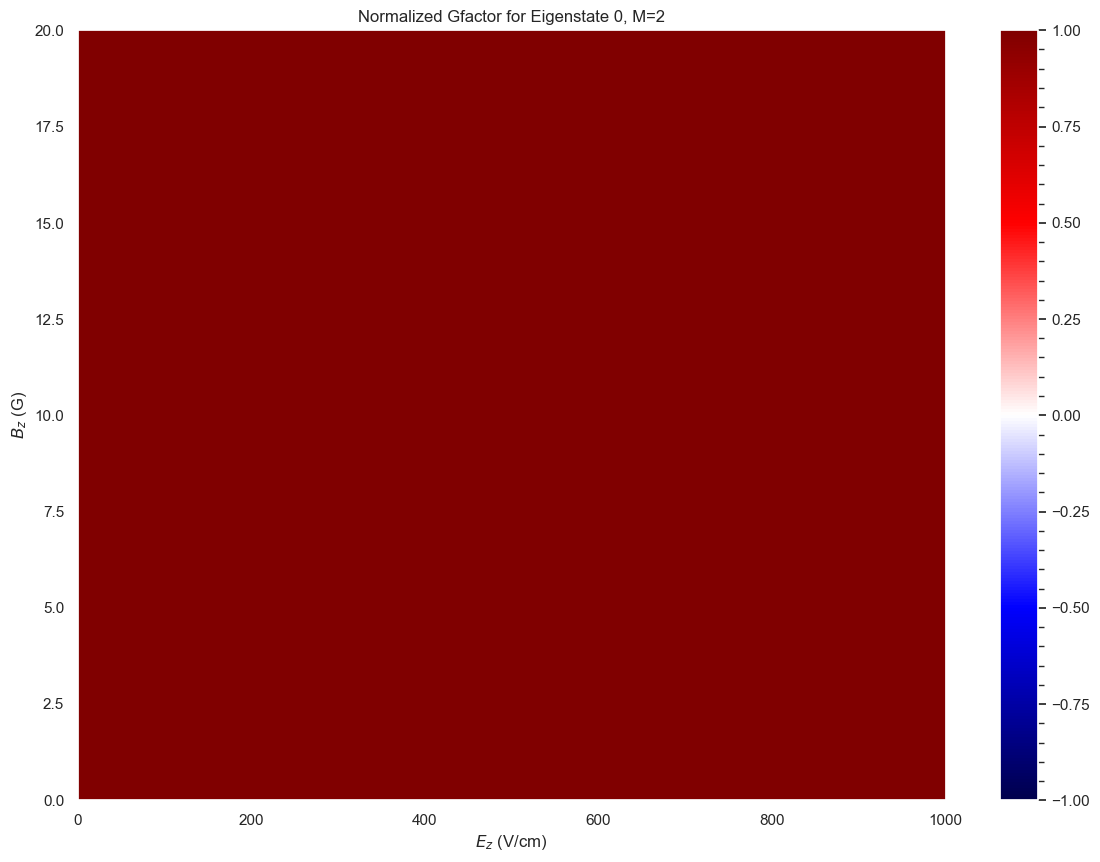

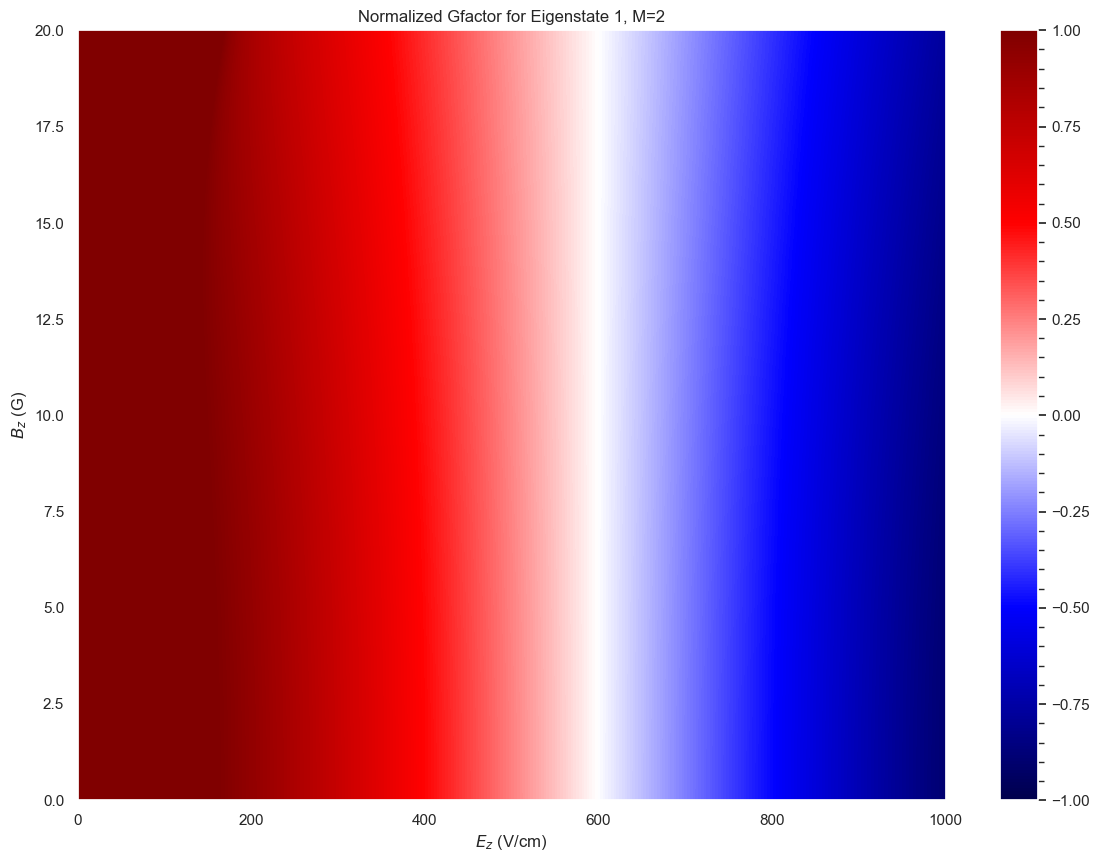

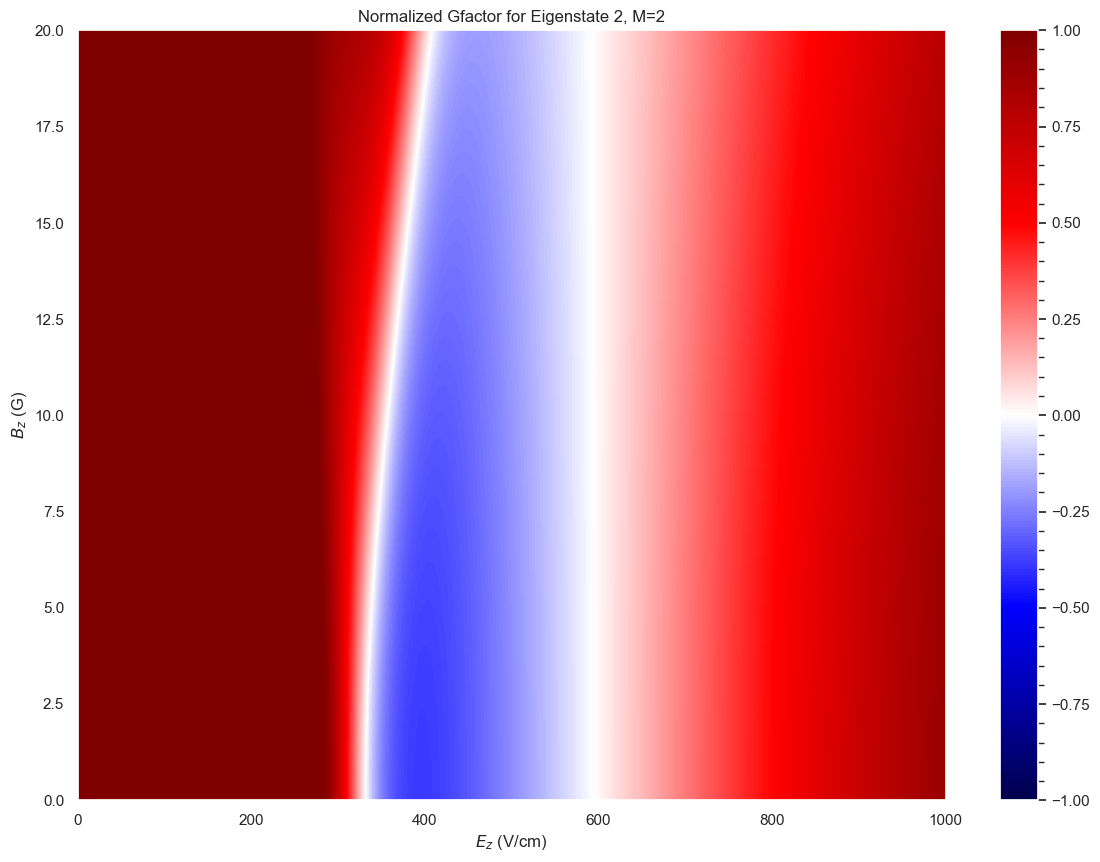

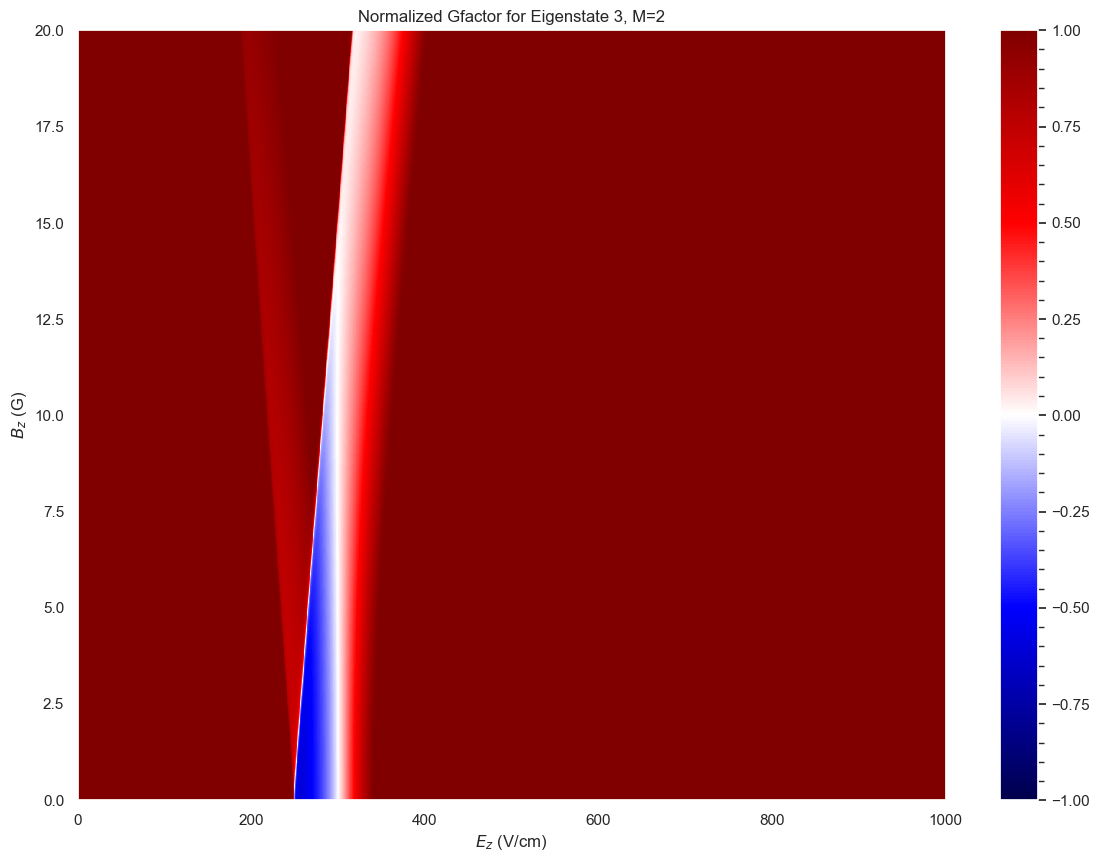

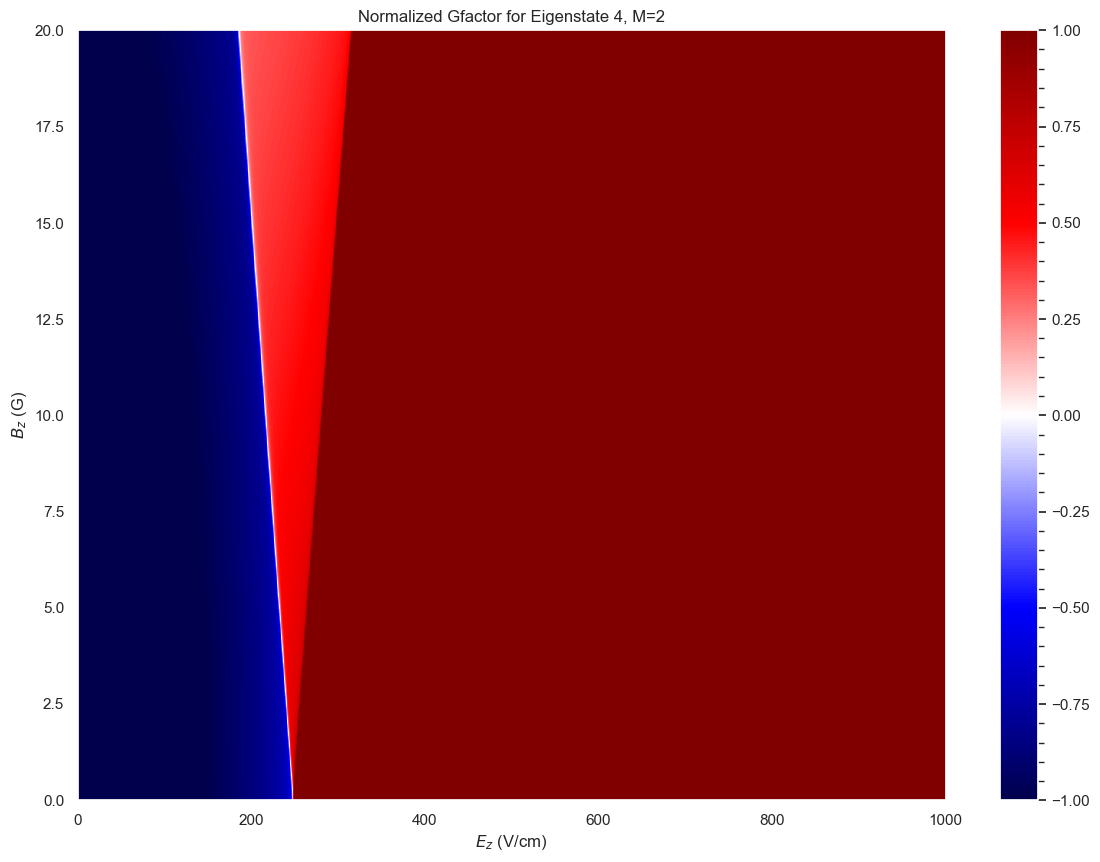

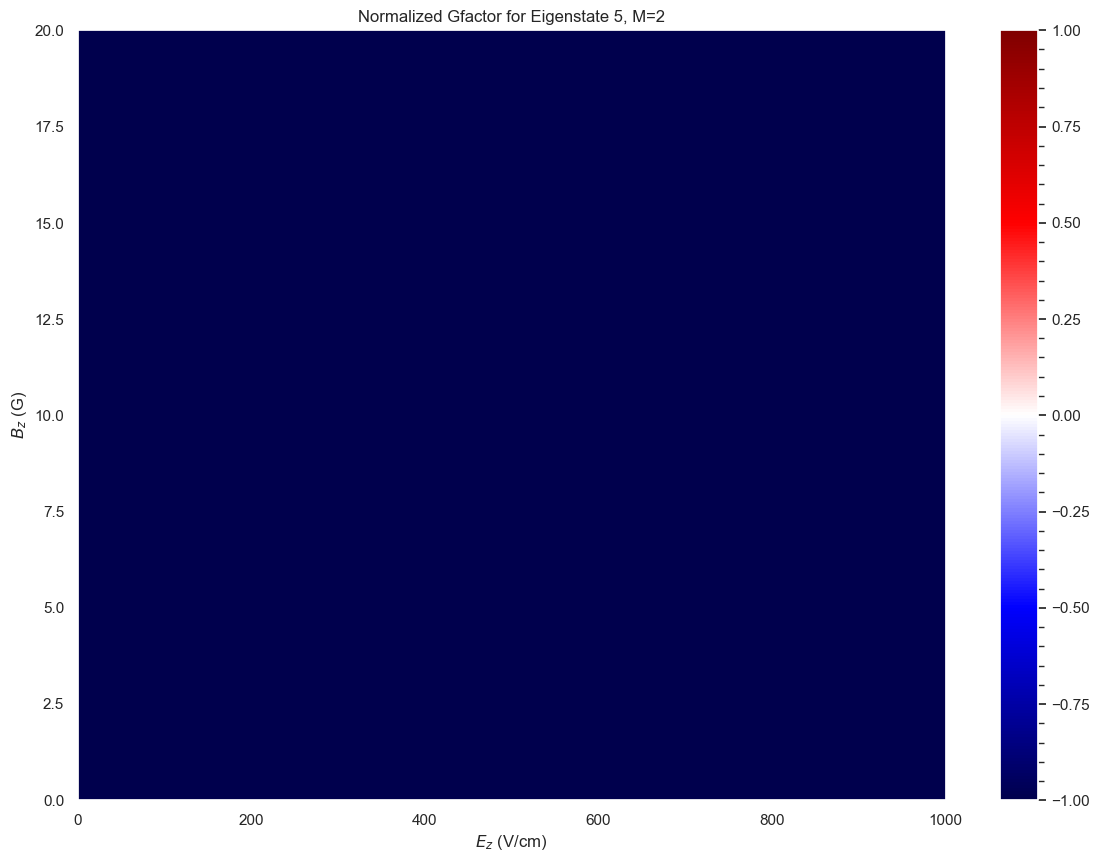

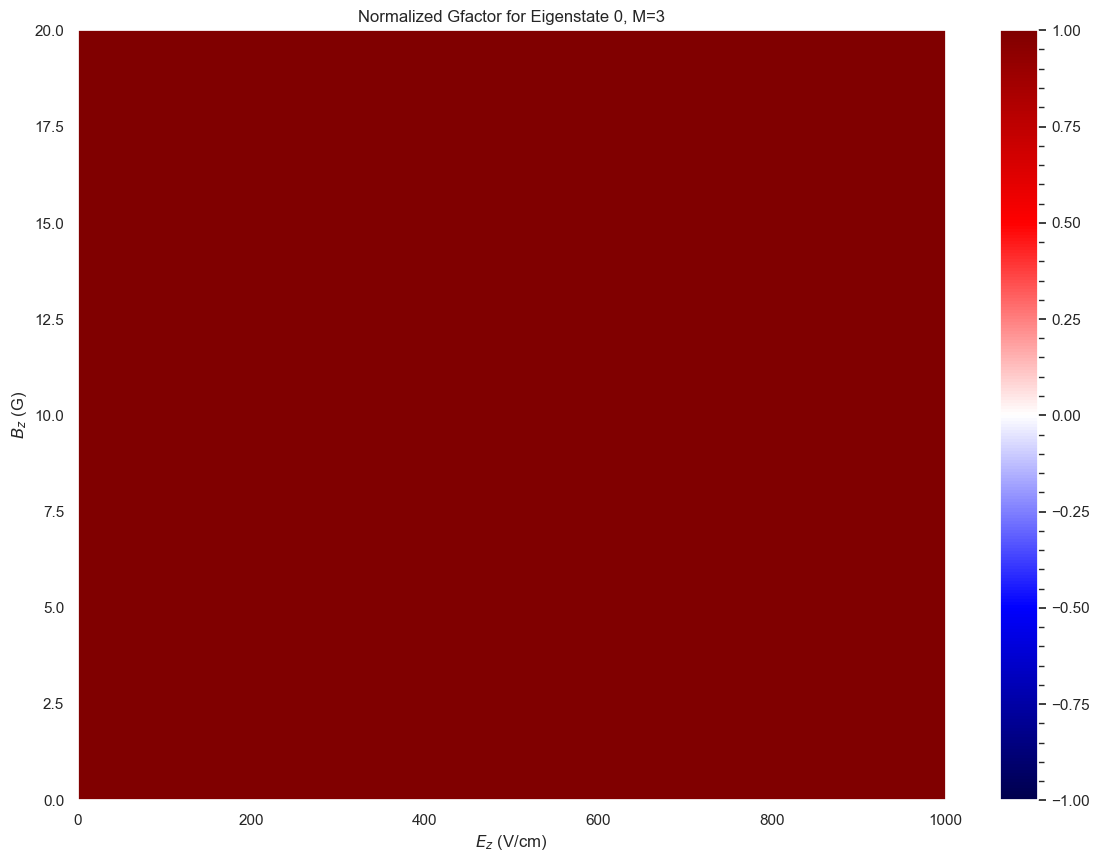

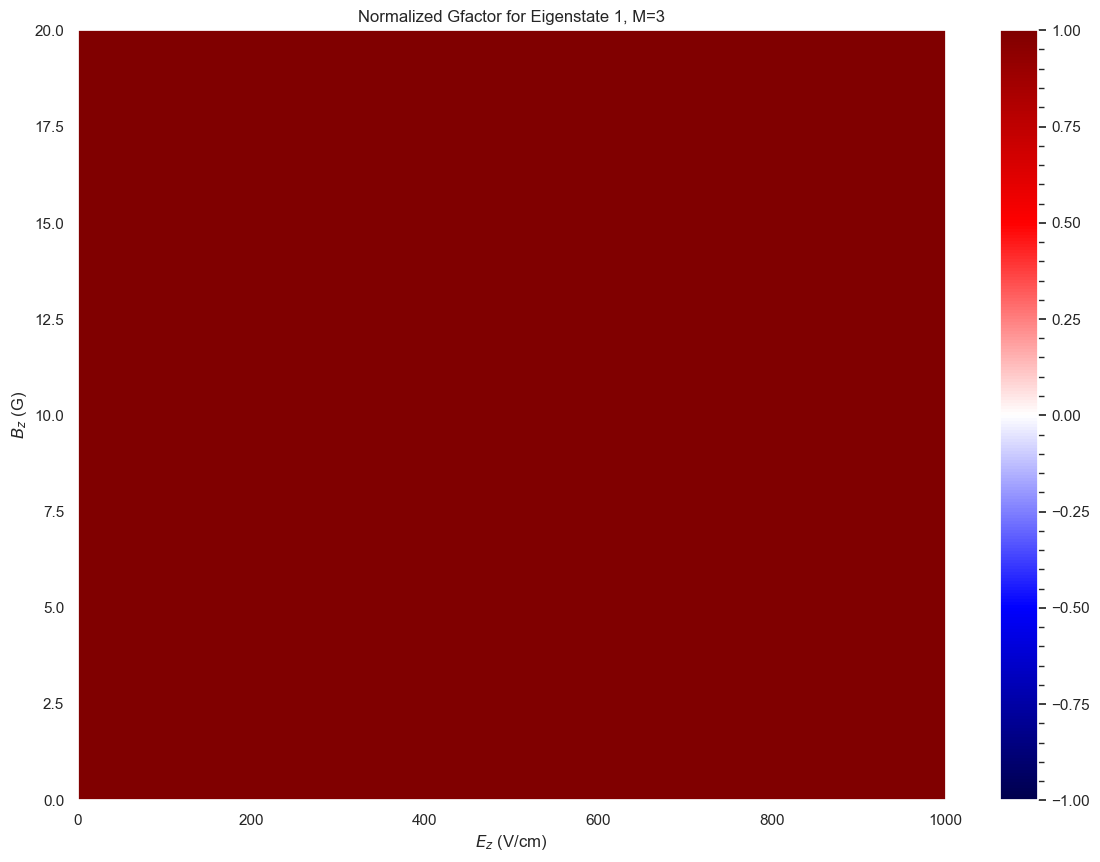

In [19]:
muBgS=1.399624494*2.0023/2
single = False
with_contour = False
for M in eval_dict.keys():
    print(M)
    if M<0:
        continue
    evals_M = eval_dict[M]
    evals_M = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_M)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_M[i])[1]/abs(Bz[-1]-Bz[-2])
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
        cbar.minorticks_on()
        if with_contour:
            try:
                conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,-0.01,0,0.01,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        if single:
            geff_M = np.gradient(evals_M[i])[1]/abs(Bz[-1]-Bz[-2])
            try:
                conmap = plt.contour(*mesh,geff_M/muBgS,colors='gold',levels=[0],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        plt.title('Normalized Gfactor for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

-1
1


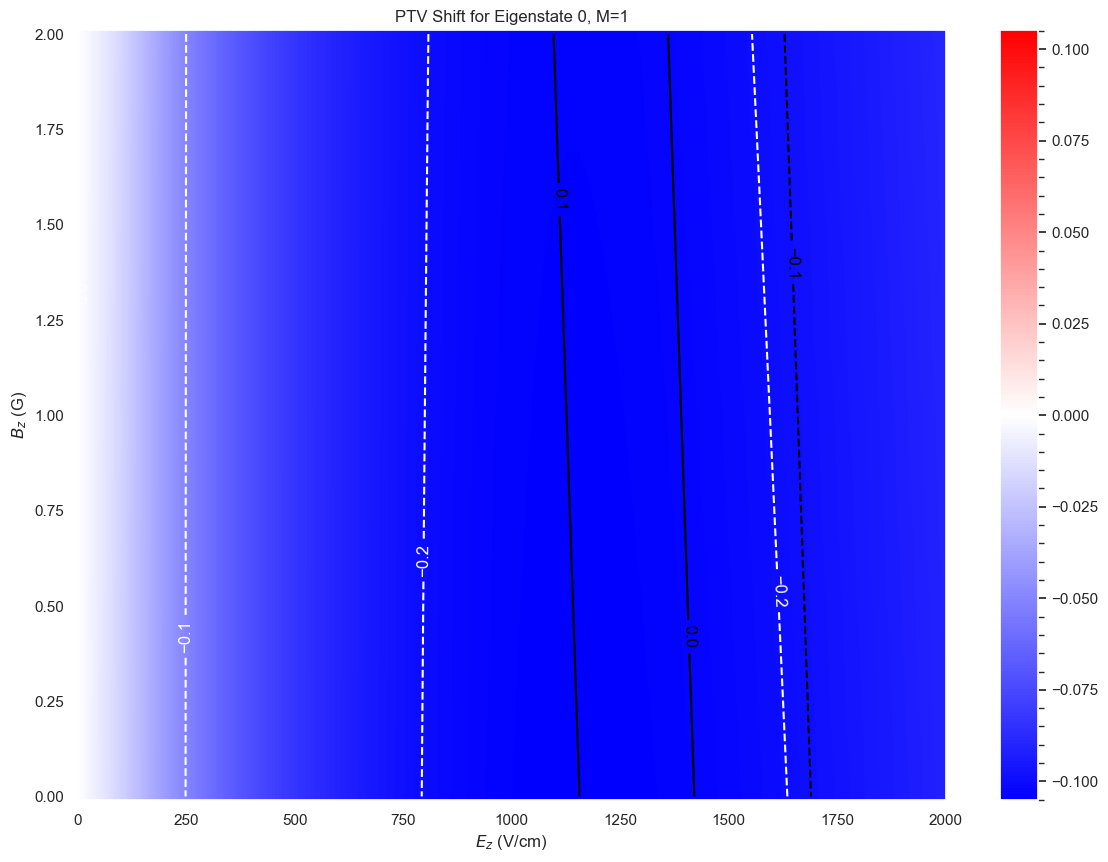

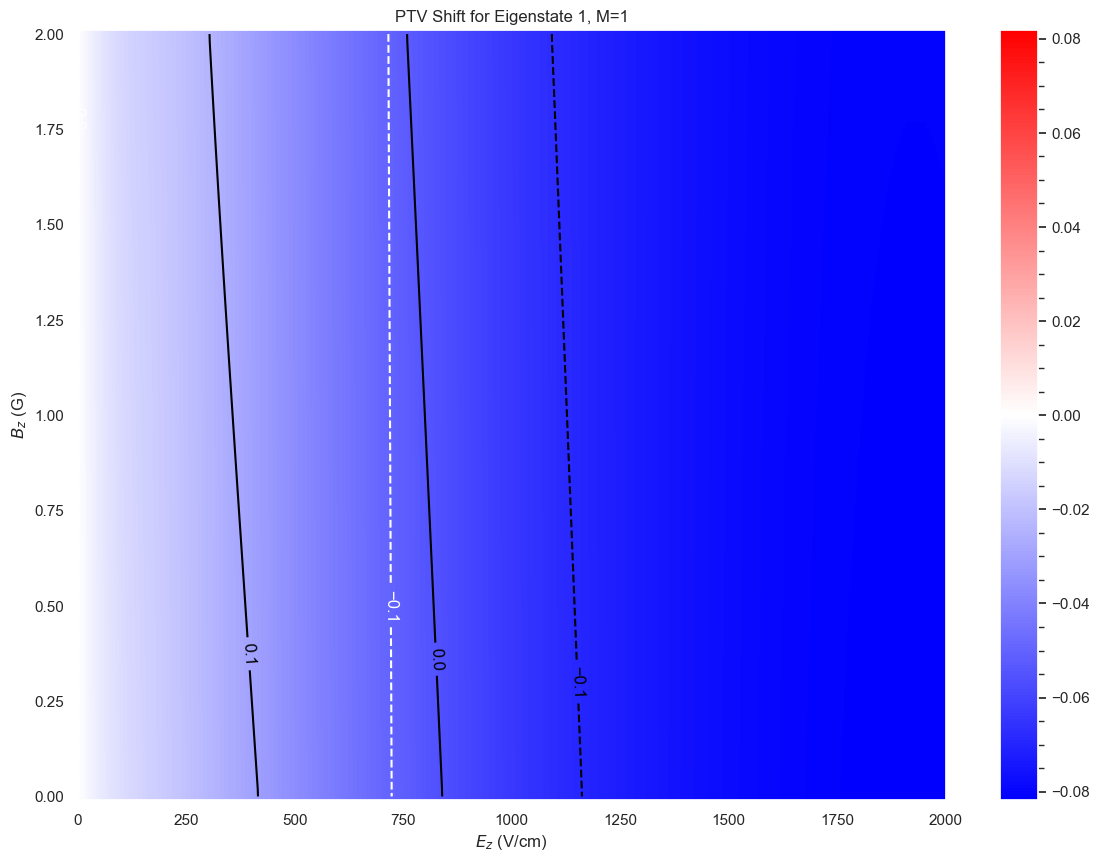

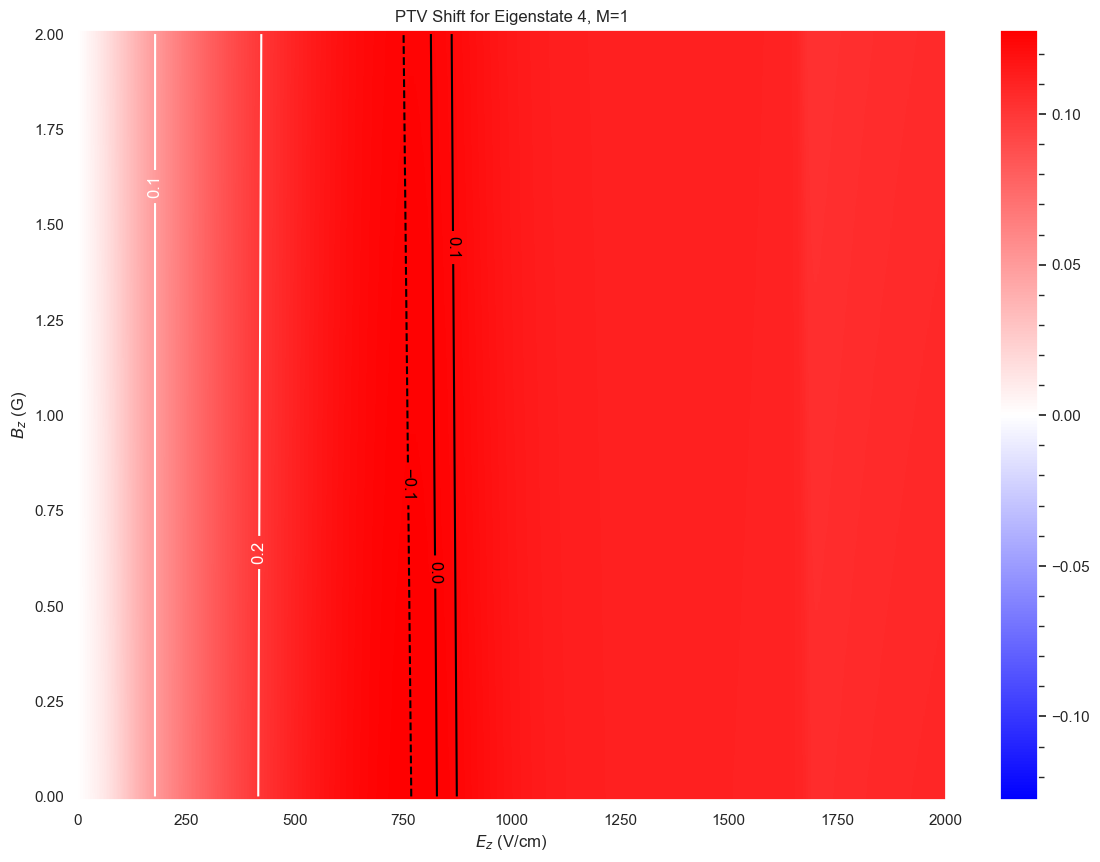

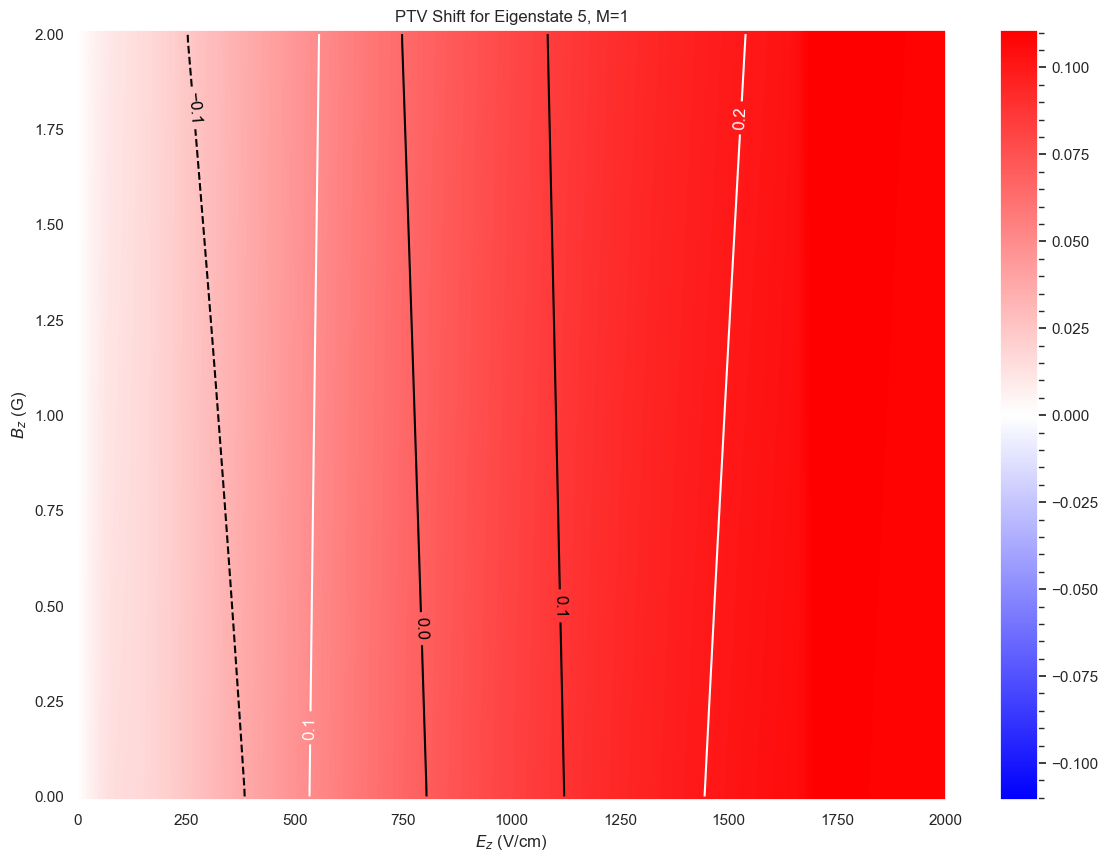

In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

muBgS=1.399624494*2.0023/2
with_contour=True
for M in eval_dict.keys():
    print(M)
    if M<0:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    PTV_M = PTV_dict[M]
    # PTV_M = PTV_EB
    evals_M = eval_dict[M]
    # evals_M = evals_EB
    for i in range(len(PTV_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_M[i])[1]/abs(Bz[-1]-Bz[-2])
        PTV = PTV_M[i]
        max_delta = max(abs(PTV.max()),abs(PTV.min()))
        if max_delta==0:
            max_delta+=0.001
        plt.grid(False)
        plt.pcolormesh(*mesh,PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vmin=-max_delta,vcenter=0,vmax=max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('PTV Shift for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')
        if with_contour:
            try:
                conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
            try:
                conmap = plt.contour(*mesh,PTV/0.5,colors='white',levels=np.arange(-1,1.1,0.1),vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")

In [35]:
geff1=np.gradient(eval_dict[1][1])[1]/abs(Bz[-1]-Bz[-2])
plt.plot(Ez,geff1[:,0])
plt.xlim(295,300)a
plt.ylim(-0.001,0.001)

(-0.001, 0.001)

In [36]:
0.00075*2/(1)
#1.5 kHz/G/(V/cm)
#15 mHz/nT/(V/cm)

0.0015

In [17]:
geff2=np.gradient(eval_dict[1][1])[1]/abs(Bz[-1]-Bz[-2])
plt.plot(Ez,geff2[:,0])
plt.xlim(835,845)
plt.ylim(-0.001,0.001)

(-0.001, 0.001)

In [18]:
0.00075*2/(4)
#1.5 kHz/G/(V/cm)
#15 mHz/nT/(V/cm)

0.000375

(-0.001, 0.001)

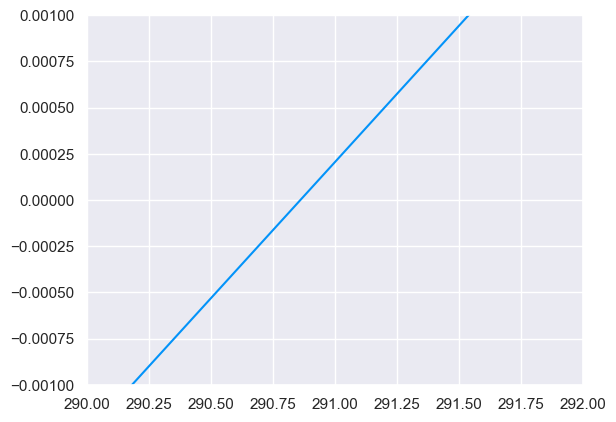

In [42]:
geff2=np.gradient(eval_dict[1][5])[1]/abs(Bz[-1]-Bz[-2])
plt.plot(Ez,geff2[:,0])
plt.xlim(290,292)
plt.ylim(-0.001,0.001)

In [44]:
0.0005*2/(0.75)

0.0013333333333333333

-2
-1
0
1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  from ipykernel import kernelapp as app


2


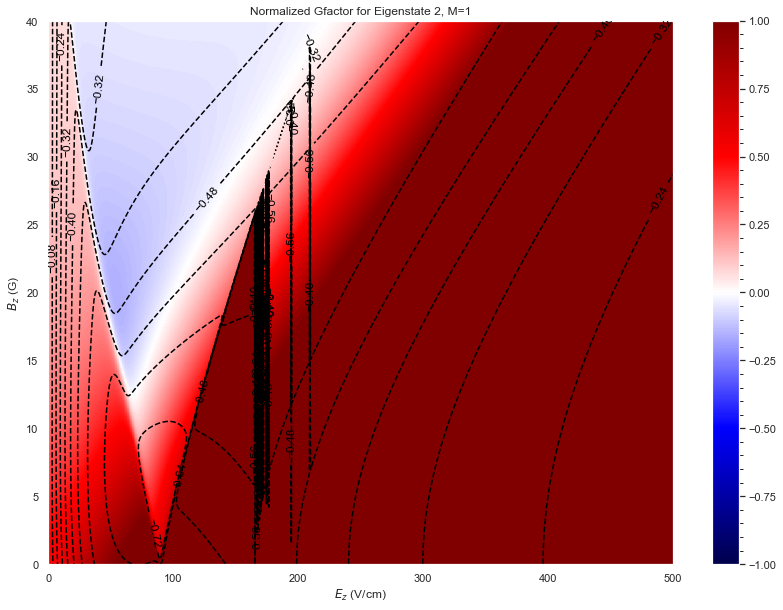

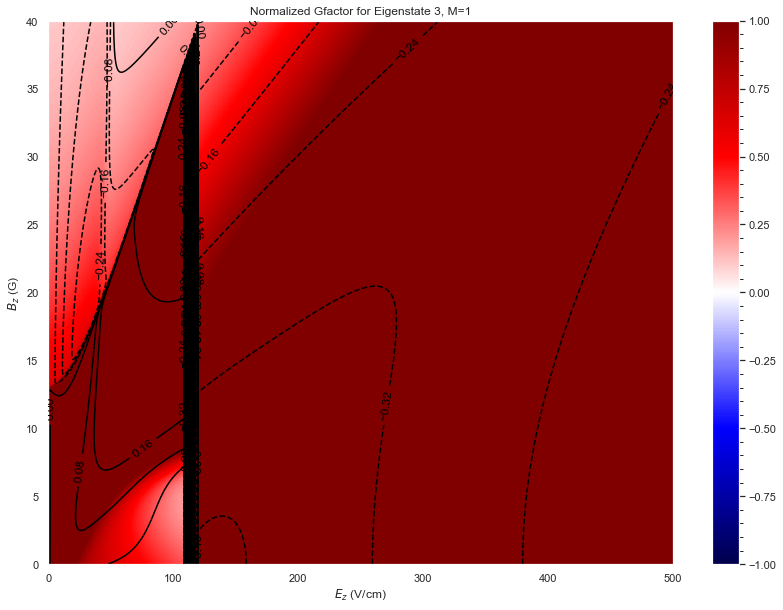

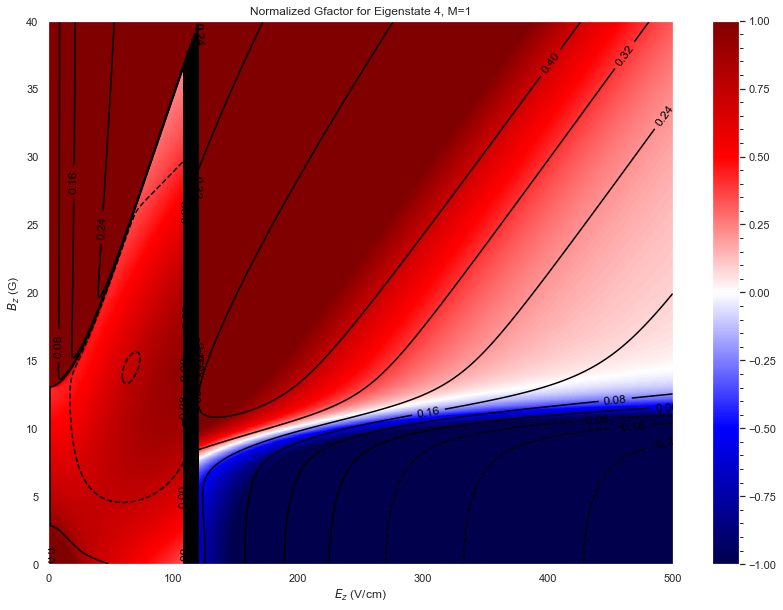

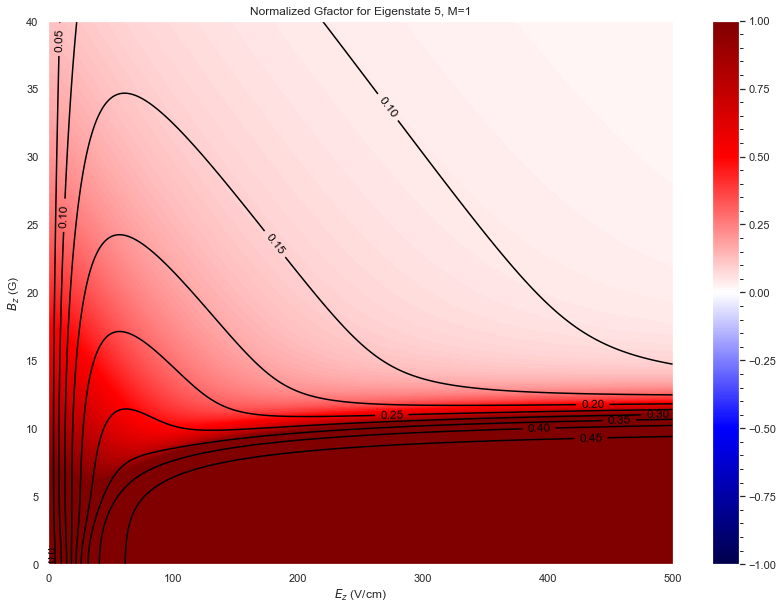

In [18]:
muBgS=1.399624494*2.0023/2
with_contour = True
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    PTV_EB = PTV_dict[M]-PTV_dict[-M]
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/abs(Bz[-1]-Bz[-2])
        PTV = PTV_EB[i]
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))#,vmin=-1,vmax=1)
        cbar = plt.colorbar()
        cbar.minorticks_on()
        if with_contour:
#             try:
#                 conmap = plt.contour(*mesh,geff/muBgS,colors='black',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#                 plt.clabel(conmap, inline=True, fontsize=12)
#     #             cbar = plt.colorbar()
#     #             cbar.minorticks_on()
#             except ValueError:
#                 print("Can't plot this data")
            try:
                conmap = plt.contour(*mesh,PTV,colors='black',levels=10,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        plt.title('Normalized Gfactor for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [42]:
evals_EB.shape

(2, 1201, 1001)

In [159]:
np.searchsorted(Ez,390)

1950

In [164]:
np.argmin(abs(np.gradient(evals_EB[7])[1][:,0]))

2241

In [64]:
Ez = mesh[0,:,0]
Bz = mesh[1,0,:]

In [65]:
from scipy.optimize import curve_fit

def fitFunction(xscale,data,function,guess,sigma,plot,bounds=None):
    xscale = np.array(xscale)
    data = np.array(data)
    guess = np.array(guess).astype(float)
    if bounds==None:
        bounds = (-np.inf,np.inf)
    try:
        popt,pcov = curve_fit(function,xscale,data,p0=guess,sigma=sigma,bounds=bounds)
        perr = np.round(np.sqrt((np.diag(pcov))),decimals=6)
        params = np.round(popt,decimals=6)
        fit = function(xscale,*popt)
        residuals = data - fit
        if plot:
            plotFitComparison(xscale,data,function,params,sigma)
            plotFitResiduals(xscale,residuals,sigma)
    except RuntimeError:
        print("Error - curve_fit failed")
        print(guess)
        plt.figure()
        plt.plot(xscale,data)
        plt.plot(xscale,function(xscale,*guess))
        params = []
        perr = []
        residuals = []
    return [params,perr,residuals]

def plotFitComparison(xscale,data,function,params,sigma,xlabel=None,ylabel=None):
    plt.figure()
    plt.title('Fit vs Data')
    if sigma is None:
        plt.plot(xscale,data,label='Data',marker='o')
    else:
        plt.errorbar(xscale,data,yerr=sigma,label='Data',marker='o',linestyle='None')
    plt.plot(xscale,function(xscale,*params),label='Fit')
    return

def plotFitResiduals(xscale,residuals,sigma):
    plt.figure()
    plt.title('Fit Residuals')
    if sigma is None:
        plt.plot(xscale,residuals,'o',linestyle='None')
    else:
        plt.errorbar(xscale,residuals,yerr=sigma,marker='o',linestyle='None')
    plt.plot(xscale,np.zeros(len(xscale)),linestyle='--')
    return

def quadratic(x,a,b):
    return a*x**2+b

def line(x,m,b):
    return m*x+b

def fitQuad(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = quadratic
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('a = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

def fitLine(xscale, data,guess=[1,0],sigma=None,plot=True,verbose=False):
    function = line
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot)
    if verbose:
        print('m = {} +/- {}'.format(params[0],error[0]))
        print('b = {} +/- {}'.format(params[1],error[1]))
    return [params,error,residuals]

-1
1
371.4


Text(0.5, 1.0, 'Differential g-Factor, N=1,J=1/2+ M=1/-1')

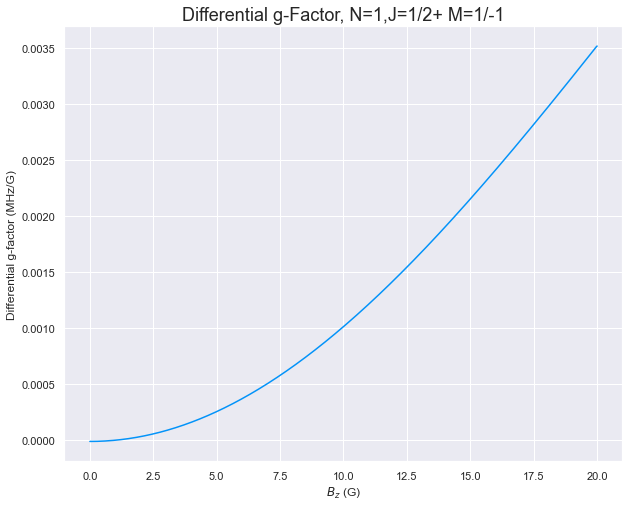

In [66]:
plt.figure(figsize=(10,8))
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [1]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Bz,np.gradient(EB)[1][iE,:]/(Bz[-1]-Bz[-2]))
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$B_z$ (G)')
plt.ylabel('Differential g-factor (MHz/G)')
plt.title('Differential g-Factor, N=1,J=1/2+ M=1/-1',fontsize=18)

a = 1e-05 +/- 0.0
b = 2e-06 +/- 0.0


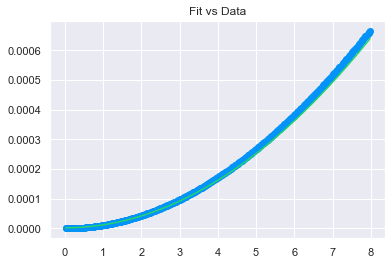

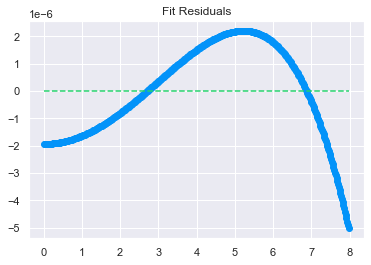

In [70]:
gE = (np.gradient(EB)[1][iE,1:400])/(Bz[-1]-Bz[-2])
params,err,resid = fitQuad(Bz[1:400],(gE-gE[0]),verbose=True)

m = -0.002478 +/- 0.0
b = 0.920249 +/- 0.00014


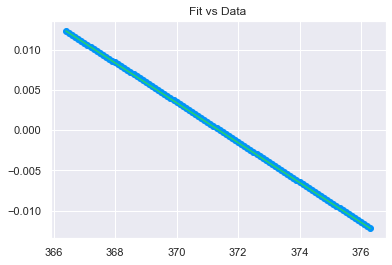

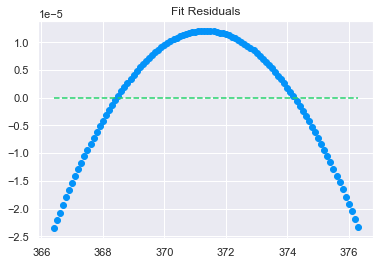

In [71]:
params,err,resid = fitLine(Ez[iE-50:iE+50],(np.gradient(EB)[1][iE-50:iE+50,0])/(Bz[-1]-Bz[-2]),verbose=True)

-1
1
60.79999999999586
Slope = 0.031908400342224676 /(V/cm)


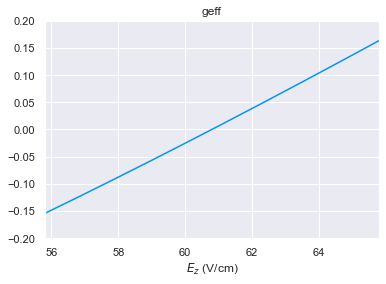

In [46]:
plt.figure()
for M in eval_dict.keys():
    print(M)
    if M!=1:
        continue
    evals_EB = eval_dict[M]-eval_dict[-M]
    for i in range(len(evals_EB)):
        if i not in [3]:
            continue
        EB = evals_EB[i]
        iE = np.argmin(abs(np.gradient(EB)[1][:,0]))
        print(Ez[iE])
        plt.plot(Ez,np.gradient(EB)[1][:,0]/(Bz[-1]-Bz[-2]))
#         plt.xlabel(r'$E_z$ (V/cm)')
plt.xlabel(r'$E_z$ (V/cm)')
plt.title('geff')
plt.xlim(55.8,65.8)
plt.ylim(-0.2,0.2)
slope = ((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])
print('Slope =',slope,'/(V/cm)')

In [42]:
((np.gradient(EB)[1][iE+100,0]-np.gradient(EB)[1][iE-100,0])/(Bz[-1]-Bz[-2]))/(Ez[iE+100]-Ez[iE-100])

0.031908400342224676

In [57]:
np.gradient(EB)[0].shape

(1201, 1001)

In [96]:
eval_dict[0][3]-eval_dict[0][4]

array([[-15.94271, -15.94267, -15.94257, ..., -11.09706, -11.12208,
        -11.1471 ],
       [-15.94304, -15.943  , -15.9429 , ..., -11.09697, -11.12198,
        -11.147  ],
       [-15.94403, -15.944  , -15.9439 , ..., -11.09667, -11.12169,
        -11.14671],
       ...,
       [-40.21951, -40.21936, -40.21894, ..., -12.61294, -12.64068,
        -12.66841],
       [-40.21984, -40.2197 , -40.21928, ..., -12.61309, -12.64083,
        -12.66857],
       [-40.22018, -40.22004, -40.21962, ..., -12.61325, -12.64098,
        -12.66872]])

In [164]:
d = eval_dict[0][3]-eval_dict[0][4]
(abs(d)<0.1).any()

True

In [141]:
x = np.zeros((100,100))
y = np.zeros((100,100))+1
y[3:5,20:80] = 1

In [142]:
d = x-y
testmesh = np.array(np.meshgrid(np.arange(100),np.arange(100),indexing='ij'))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1015796236.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

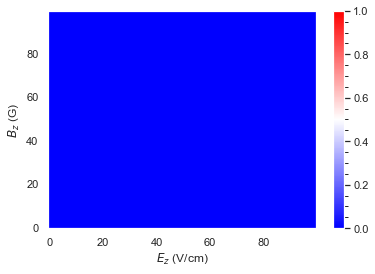

In [143]:
plt.figure()
plt.grid(False)
plt.pcolormesh(*testmesh,abs(d)<0.1,shading='auto',cmap='bwr',vmin=0,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [154]:
(abs(d)<0.1).nonzero()[0].size

0

In [158]:
len(eval_dict.keys())

5

In [44]:
E_thresh = 0.001
PTV_thresh = 0.05
geff_thresh = 1e-2
Ez_idx_match = []
Bz_idx_match = []
eigenstate_match = []
M_match = []
M_list = list(eval_dict.keys())
for Midx in range(len(M_list)):
    Mi = M_list[Midx]
    for Mjdx in range(Midx,len(M_list)):
        Mj = M_list[Mjdx]
        if abs(Mi-Mj)>2:
            continue
        else:
            evals_Mi = eval_dict[Mi]
            evals_Mj = eval_dict[Mj]
            PTV_Mi = PTV_dict[Mi]
            PTV_Mj = PTV_dict[Mj]
            for i in range(len(evals_Mi)):
                for j in range(i,len(evals_Mj)):
                    if i==j and Mi==Mj:
                        continue
                    deltaE_ij = evals_Mi[i]-evals_Mj[j]
                    E_bool_match = (abs(deltaE_ij)<E_thresh)
                    if E_bool_match.any():
                        geff_i = np.gradient(evals_Mi[i])[1]/(Bz[1]-Bz[0])
                        geff_j = np.gradient(evals_Mj[j])[1]/(Bz[1]-Bz[0])
                        deltag_ij = geff_i - geff_j
                        g_bool_match = np.logical_and(abs(deltag_ij)<geff_thresh, E_bool_match)
                        if g_bool_match.any():
                            PTV_i = PTV_Mi[i]
                            PTV_j = PTV_Mj[j]
                            deltaPTV_ij = PTV_i - PTV_j
                            PTV_bool_match = np.logical_and(abs(deltaPTV_ij)>PTV_thresh, g_bool_match)
                            if PTV_bool_match.any():
                                #Found a match!
                                idx_match = PTV_bool_match.nonzero()
                                print('Found a match!')
                                print('i = {}, Mi = {}'.format(i,Mi))
                                print('j = {}, Mj = {}'.format(j,Mj))
                                print('Ez vals = {}'.format((Ez[idx_match[0]].min(),Ez[idx_match[0]].max())))
                                print('Bz vals = {}'.format((Bz[idx_match[1]].min(),Bz[idx_match[1]].max())))
                                print('delta geff = {}'.format(deltag_ij[idx_match]))
                                print('delta PTV = {}'.format(deltaPTV_ij[idx_match]))
                                Ez_idx_match.append(idx_match[0])
                                Bz_idx_match.append(idx_match[1])
                                eigenstate_match.append([i,j])
                                M_match.append([Mi,Mj])

Found a match!
i = 1, Mi = -1
j = 1, Mj = 1
Ez vals = (61.2, 61.65)
Bz vals = (0.001, 0.680983)
delta geff = [-0.00117 -0.00117 -0.00118 -0.00118 -0.00119 -0.00119 -0.0012  -0.00121
 -0.00122 -0.00123 -0.00125 -0.00126 -0.00128 -0.0013  -0.00132 -0.00134
 -0.00137 -0.00139 -0.00142 -0.00144 -0.00147 -0.0015  -0.00154 -0.00157
 -0.0016  -0.00164 -0.00168 -0.00172 -0.00176 -0.0018  -0.00185 -0.00189
 -0.00194 -0.00199 -0.00204  0.01   ]
delta PTV = [0.26754 0.26754 0.26754 0.26753 0.26753 0.26753 0.26753 0.26753 0.26752
 0.26752 0.26751 0.26751 0.2675  0.2675  0.26749 0.26749 0.26748 0.26747
 0.26746 0.26746 0.26745 0.26744 0.26743 0.26742 0.26741 0.2674  0.26739
 0.26737 0.26736 0.26735 0.26734 0.26732 0.26731 0.26729 0.26728 0.26809]
Found a match!
i = 4, Mi = -1
j = 4, Mj = 1
Ez vals = (44.550000000000004, 44.550000000000004)
Bz vals = (0.001, 0.5809855)
delta geff = [0.00153 0.00153 0.00153 0.00154 0.00154 0.00155 0.00156 0.00156 0.00157
 0.00159 0.0016  0.00161 0.00163 0.00164 0.001

In [89]:
#Version without E thresh

PTV_thresh = 0.05
geff_thresh = 1e-2
deff_thresh = 1e-2
Ez_idx_match = []
Bz_idx_match = []
eigenstate_match =[]
M_match = []
M_list = list(eval_dict.keys())
for Midx in range(len(M_list)):
    Mi = M_list[Midx]
    for Mjdx in range(Midx,len(M_list)):
        Mj = M_list[Mjdx]
        if abs(Mi-Mj)>2:
            continue
        else:
            evals_Mi = eval_dict[Mi]
            evals_Mj = eval_dict[Mj]
            PTV_Mi = PTV_dict[Mi]
            PTV_Mj = PTV_dict[Mj]
            for i in range(len(evals_Mi)):
                for j in range(i,len(evals_Mj)):
                    if i==j and Mi==Mj:
                        continue
                    geff_i = np.gradient(evals_Mi[i])[1]/(Bz[1]-Bz[0])
                    geff_j = np.gradient(evals_Mj[j])[1]/(Bz[1]-Bz[0])
                    deltag_ij = geff_i - geff_j
                    g_bool_match = abs(deltag_ij)<geff_thresh
                    if g_bool_match.any():
                        deff_i = np.gradient(evals_Mi[i])[0]/(Ez[1]-Ez[0])
                        deff_j = np.gradient(evals_Mj[j])[0]/(Ez[1]-Ez[0])
                        deltad_ij = deff_i - deff_j
                        d_bool_match = np.logical_and(abs(deltad_ij)<deff_thresh, g_bool_match)
                        if d_bool_match.any():
                            PTV_i = PTV_Mi[i]
                            PTV_j = PTV_Mj[j]
                            deltaPTV_ij = PTV_i - PTV_j
                            PTV_bool_match = np.logical_and(abs(deltaPTV_ij)>PTV_thresh, d_bool_match)
                            if PTV_bool_match.any():
                                #Found a match!
                                idx_match = PTV_bool_match.nonzero()
                                if (idx_match[1]==0).any():
                                    print('Found a match!')
                                    print('i = {}, Mi = {}'.format(i,Mi))
                                    print('Ei range = {}'.format((evals_Mi[i][idx_match[0],idx_match[1]].min(),evals_Mi[i][idx_match[0],idx_match[1]].max())))
                                    print('j = {}, Mj = {}'.format(j,Mj))
                                    print('Ei range = {}'.format((evals_Mj[j][idx_match[0],idx_match[1]].min(),evals_Mj[j][idx_match[0],idx_match[1]].max())))
                                    print('Ez vals = {}'.format((Ez[idx_match[0]].min(),Ez[idx_match[0]].max())))
                                    print('Bz vals = {}'.format((Bz[idx_match[1]].min(),Bz[idx_match[1]].max())))
                                    print('delta geff = {}'.format(deltag_ij[idx_match]))
                                    print('delta deff = {}'.format(deltad_ij[idx_match]))
                                    print('delta PTV = {}'.format(deltaPTV_ij[idx_match]))
                                    Ez_idx_match.append(idx_match[0])
                                    Bz_idx_match.append(idx_match[1])
                                    eigenstate_match.append([i,j])
                                    M_match.append([Mi,Mj])

Found a match!
i = 1, Mi = -1
Ei range = (7297.37476588, 7297.53874457)
j = 1, Mj = 0
Ei range = (7297.99137654, 7298.15650273)
Ez vals = (40.8, 41.4)
Bz vals = (0.001, 0.840979)
delta geff = [-0.00507 -0.00506 -0.00505 -0.00504 -0.00504 -0.00505 -0.00507 -0.0051
 -0.00514 -0.00518 -0.00523 -0.00529 -0.00535 -0.00543 -0.00551 -0.00559
 -0.00569 -0.00579 -0.00589 -0.00601 -0.00613 -0.00625  0.00059  0.00062
  0.00068  0.00073  0.00077  0.0008   0.00082  0.00084  0.00085  0.00085
  0.00084  0.00082  0.0008   0.00077  0.00073  0.00069  0.00064  0.00058
  0.00051  0.00044  0.00036  0.00028  0.00624  0.0063   0.0064   0.00649
  0.00657  0.00665  0.00671  0.00677  0.00682  0.00686  0.00689  0.00692
  0.00694  0.00695  0.00695  0.00695  0.00694  0.00692  0.00689  0.00686
  0.00682  0.00677]
delta deff = [-0.00754 -0.00678 -0.00602 -0.00525 -0.00448 -0.0037  -0.00292 -0.00213
 -0.00134 -0.00053  0.00027  0.00109  0.00191  0.00273  0.00356  0.0044
  0.00524  0.00609  0.00694  0.0078   0.00866  

In [53]:
for i in range(len(Ez_idx_match)):
    print(np.array([Ez_idx_match[i],Bz_idx_match[i]]).T)

[[ 213  391]
 [ 215  394]
 [ 216  395]
 ...
 [ 645  999]
 [ 645 1000]
 [ 646 1000]]
[[ 585  686]
 [ 588  690]
 [ 590  693]
 [ 593  697]
 [ 595  700]
 [ 597  703]
 [ 598  704]
 [ 600  707]
 [ 602  710]
 [ 603  711]
 [ 604  713]
 [ 605  714]
 [ 606  715]
 [ 607  717]
 [ 608  718]
 [ 609  720]
 [ 610  721]
 [ 611  722]
 [ 612  724]
 [ 613  725]
 [ 614  727]
 [ 615  728]
 [ 616  729]
 [ 616  730]
 [ 617  731]
 [ 618  732]
 [ 619  734]
 [ 620  735]
 [ 621  736]
 [ 621  737]
 [ 622  738]
 [ 623  739]
 [ 624  741]
 [ 625  742]
 [ 626  743]
 [ 626  744]
 [ 627  745]
 [ 628  746]
 [ 628  747]
 [ 629  748]
 [ 630  749]
 [ 631  750]
 [ 631  751]
 [ 632  752]
 [ 633  753]
 [ 633  754]
 [ 634  754]
 [ 634  755]
 [ 635  756]
 [ 636  757]
 [ 636  758]
 [ 637  759]
 [ 638  760]
 [ 638  761]
 [ 639  761]
 [ 639  762]
 [ 640  763]
 [ 641  764]
 [ 641  765]
 [ 642  766]
 [ 643  767]
 [ 643  768]
 [ 644  768]
 [ 644  769]
 [ 645  770]
 [ 645  771]
 [ 646  771]
 [ 646  772]
 [ 647  773]
 [ 648  774]
 [ 648

In [75]:
B_match_zeroB = []
E_match_zeroB = []
eig_match_zeroB = []
M_match_zeroB = []
for i,idx in enumerate(Bz_idx_match):
    match = (idx==0)
    print(match.any())
    if match.any()==True:
        B_match_zeroB.append(idx[match])
        E_match_zeroB.append(Ez_idx_match[i][match])
        eig_match_zeroB.append(eigenstate_match[i])
        M_match_zeroB.append(M_match[i])

False
False
True
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False


In [76]:
M_match_zeroB

[[-1, 0], [-1, 1], [-1, 1], [0, 1]]

In [84]:
eig_match_zeroB

[[1, 1], [1, 1], [4, 4], [1, 1]]

In [77]:
B_match_zeroB

[array([0, 0, 0], dtype=int64),
 array([0], dtype=int64),
 array([0, 0], dtype=int64),
 array([0, 0, 0], dtype=int64)]

In [78]:
E_match_zeroB

[array([136, 137, 138], dtype=int64),
 array([137], dtype=int64),
 array([122, 123], dtype=int64),
 array([136, 137, 138], dtype=int64)]

In [82]:
Ez[123]

36.9

In [25]:
Bz[Bz_idx_match[0]].min

<function ndarray.min>

In [15]:
for i in [1,2,3,4,5]:
    print('P=',state_dict[1].parities[i])
    state_dict[1].write_state(i)

P= 1.0
E = 36517.4317266823 MHz

 -1.2e-09 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 5.7e-09 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 1.62074e-05 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 2.38863e-05 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 -1.6615e-05 |K=-1,N=2,J=2.5,F=2.0,M=1.0> 

 0.0001255744 |K=1,N=2,J=2.5,F=2.0,M=1.0> 

 -0.7070124773 |K=-1,N=2,J=2.5,F=3.0,M=1.0> 

 0.7072010606 |K=1,N=2,J=2.5,F=3.0,M=1.0> 

P= -1.0
E = 36603.17381357 MHz

 -4.36875e-05 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 5.21764e-05 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 -0.0088374378 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 -0.0088530449 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 0.7071838284 |K=-1,N=2,J=2.5,F=2.0,M=1.0> 

 0.7069190443 |K=1,N=2,J=2.5,F=2.0,M=1.0> 

 -1.79497e-05 |K=-1,N=2,J=2.5,F=3.0,M=1.0> 

 -0.0001263531 |K=1,N=2,J=2.5,F=3.0,M=1.0> 

P= -1.0
E = 36605.9437303989 MHz

 -3.8e-09 |K=-1,N=2,J=1.5,F=1.0,M=1.0> 

 6.2e-09 |K=1,N=2,J=1.5,F=1.0,M=1.0> 

 -5.25585e-05 |K=-1,N=2,J=1.5,F=2.0,M=1.0> 

 6.02012e-05 |K=1,N=2,J=1.5,F=2.0,M=1.0> 

 0.0001224221 |K=-1,N=2,J=2.5,

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_11232/295935719.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_11232/295935719.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

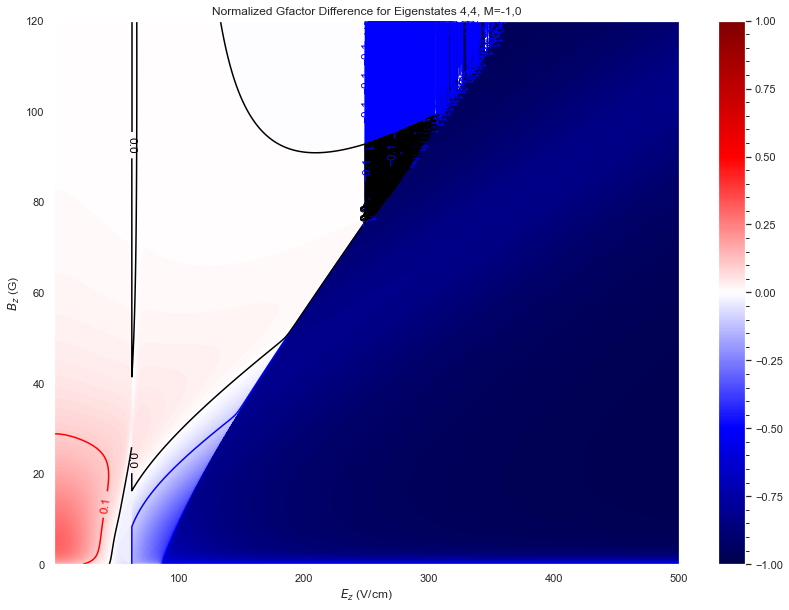

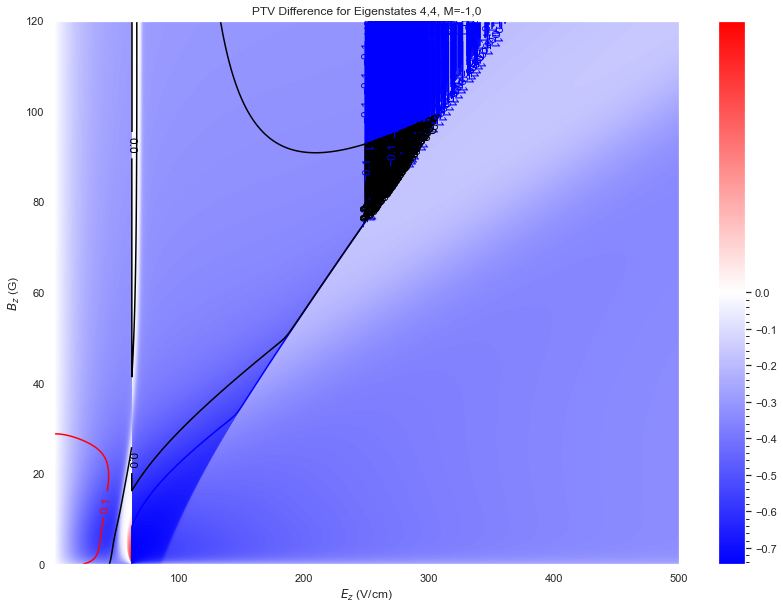

In [13]:
muBgS=1.399624494*2.0023/2
with_contour = True

idx = 4
evals_1 = eval_dict[-1][idx]
evals_2 = eval_dict[0][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=-1,0'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[-1][idx]
PTV_2 = PTV_dict[0][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=0.0))
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=-1,0'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_13244/1796785351.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_13244/1796785351.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

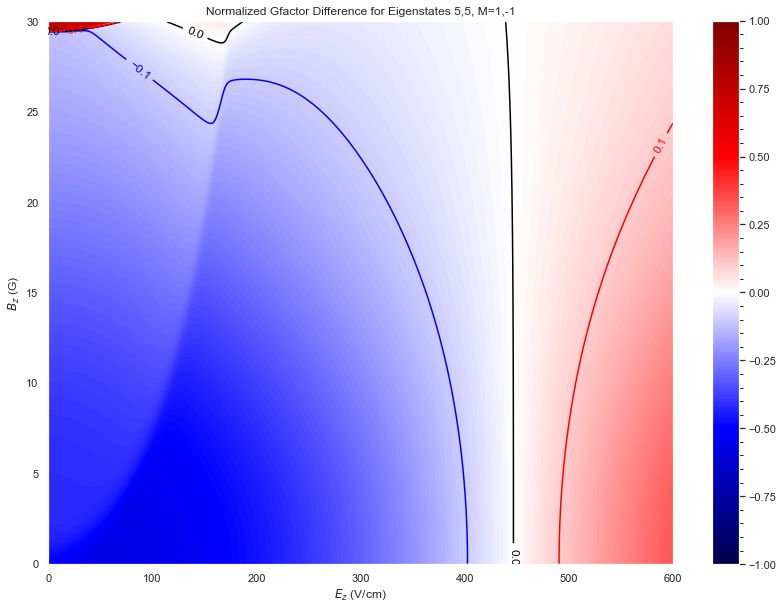

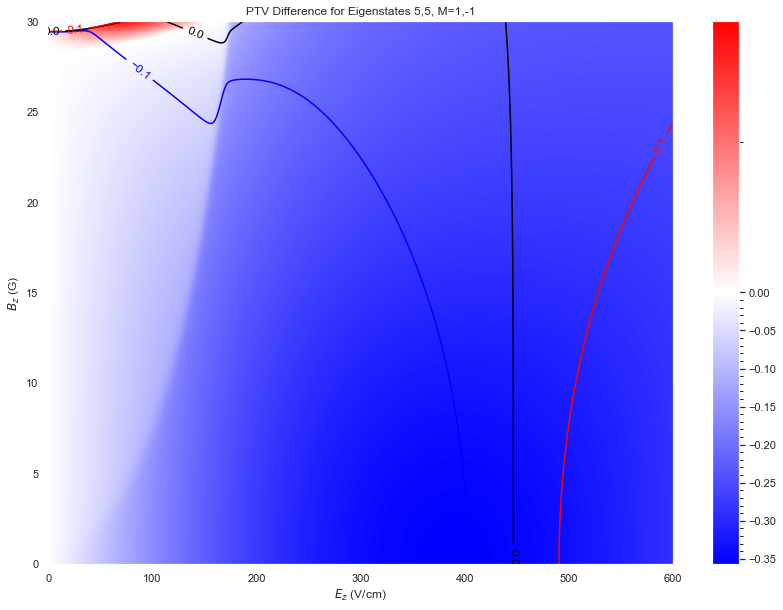

In [191]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 5
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=0.0))
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

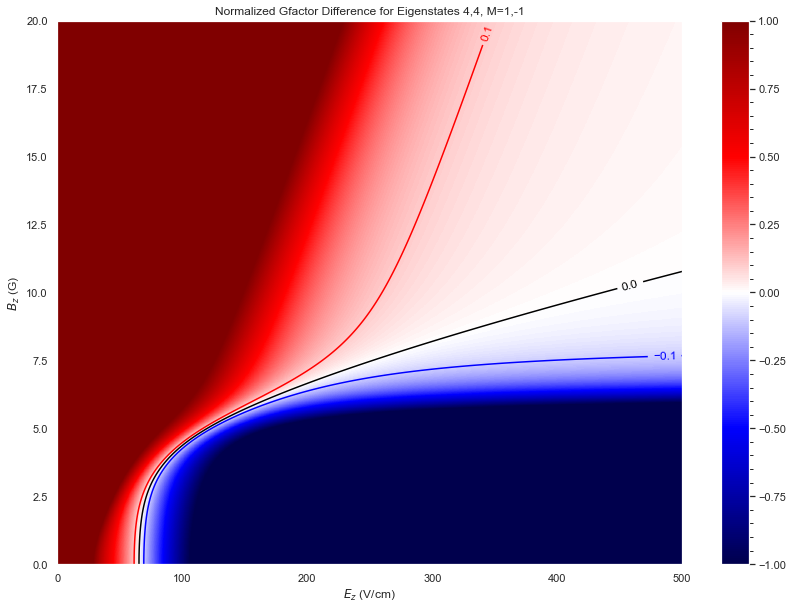

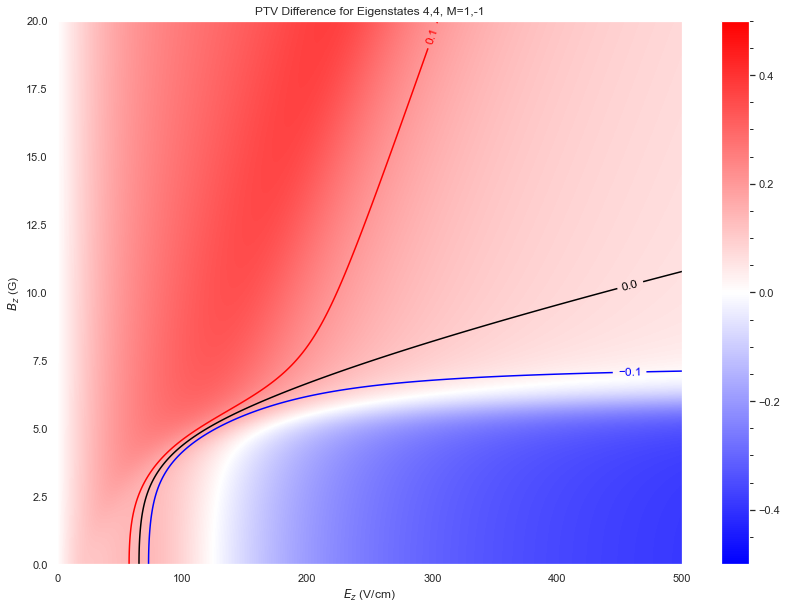

In [372]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',vmin=-0.5,vmax=0.5)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [270]:
Em = np.searchsorted(Ez,40)
Em

160

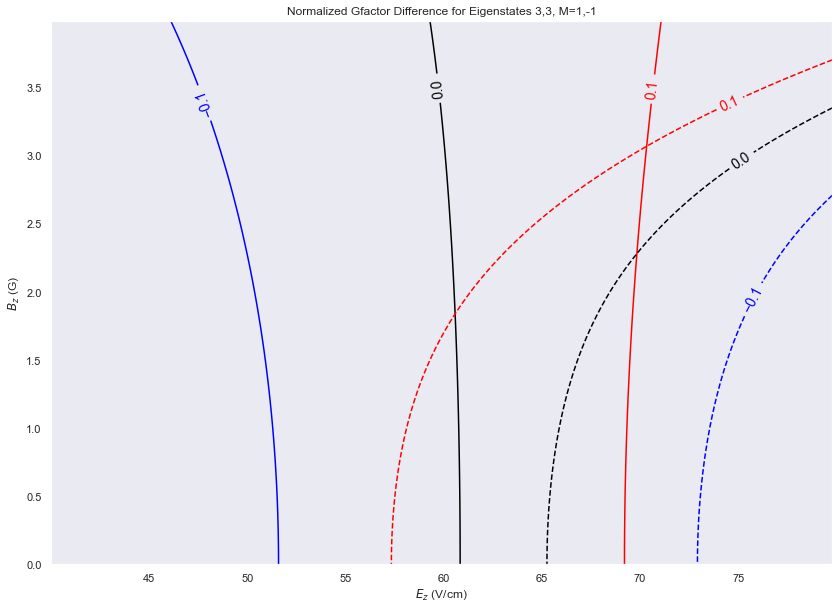

In [377]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False,manual=[(50,3.5),(60,3.5),(70,3.5)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True,manual=[(75,3.25),(75,3),(75,2)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

In [392]:
np.linspace(-0.1,0.1,21)

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

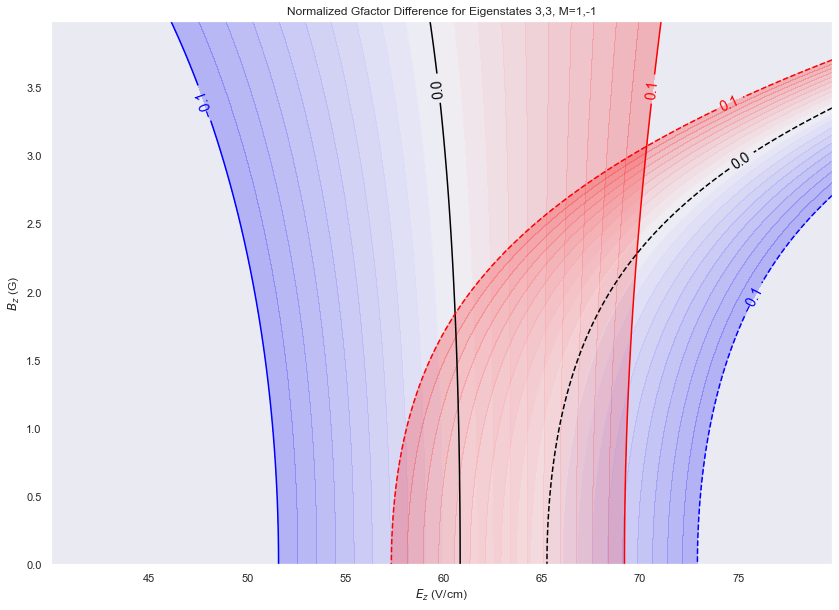

In [393]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(50,3.5),(60,3.5),(70,3.5)], fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(75,3.25),(75,3),(75,2)],fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

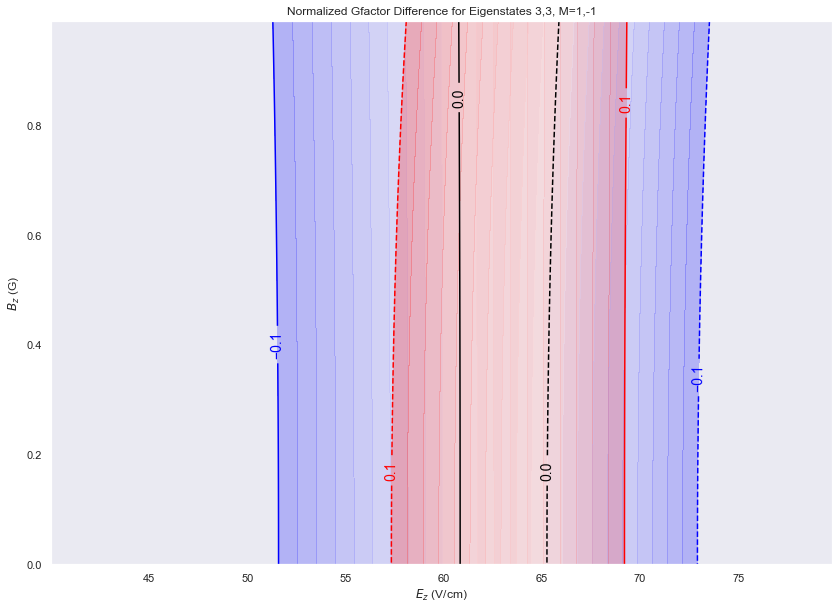

In [394]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,1)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3213161298.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


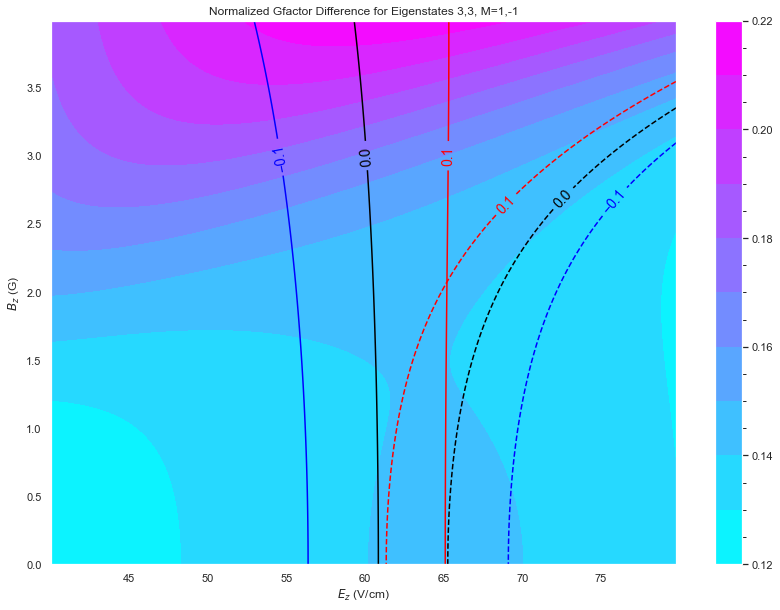

In [305]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(55,3),(60,3),(65,3)], fontsize=14,rightside_up=False)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('Normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
delta_PTV = PTV_1 - PTV_2
plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
cbar = plt.colorbar()
cbar.minorticks_on()
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(68,2.75),(72,2.75),(75,2.75)],fontsize=14,rightside_up=True)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")